In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from yellowbrick.style.colors import resolve_colors
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist ## distance matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#plt.style.use('seaborn-whitegrid')
np.set_printoptions(precision=5, suppress=True)

In [2]:
def plot_cumulative_variance_explained(fitted_data):
    n_features = fitted_data.components_.shape[0]
    plt.plot(np.arange(1, n_features+1), np.cumsum(fitted_data.explained_variance_ratio_))

    plt.title('PCA cumulative variance explained', size=15)
    plt.xticks(np.arange(0, n_features, step=round(n_features/10, -2)))
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xlabel('Number of components')
    plt.ylabel('% Variance explained')

    plt.show()

In [79]:
# Import data set
X = np.load('C:/data/p2_unsupervised/X.npy')
print(X.shape)
Xclu = X

(2169, 45768)


In [4]:
Xl = np.log2(X+1)
pca_xl = PCA().fit(Xl)
Xlt = pca_xl.transform(Xl)
print(X.shape)

(2169, 45768)


In [5]:
pca_x = PCA().fit(X)
Xt = pca_x.transform(X)
print(X.shape)

(2169, 45768)


In [6]:
print(X)
print(X.shape)
print("The min of the first column X (gene): ",np.round(np.min(X[:,0]), 5))
print("The max of the first column X (gene): ",np.round(np.max(X[:,0]), 5))
print(Xl)
print("The min of the first column Xl (gene): ",np.round(np.min(Xl[:,0]), 5))
print("The max of the first column Xl (gene): ",np.round(np.max(Xl[:,0]), 5))
print(Xt)
print("The min of the first column Xt (gene): ",np.round(np.min(Xt[:,0]), 5))
print("The max of the first column Xt (gene): ",np.round(np.max(Xt[:,0]), 5))
print(Xlt)
print("The min of the first column Xlt (gene): ",np.round(np.min(Xlt[:,0]), 5))
print("The max of the first column Xlt( gene): ",np.round(np.max(Xlt[:,0]), 5))

[[  0.        0.      100.39219 ...   0.        0.        0.     ]
 [  0.        0.       90.88419 ...   0.        0.        0.     ]
 [  0.        0.       90.39191 ...   0.        0.        0.     ]
 ...
 [  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]]
(2169, 45768)
The min of the first column X (gene):  0.0
The max of the first column X (gene):  61.77722
[[0.      0.      6.6638  ... 0.      0.      0.     ]
 [0.      0.      6.52174 ... 0.      0.      0.     ]
 [0.      0.      6.51399 ... 0.      0.      0.     ]
 ...
 [0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]]
The min of the first column Xl (gene):  0.0
The max of the first column Xl (gene):  5.97217
[[ -6037.51606  -8015.56296  -3006.66291 ...      1.21341  

%variance explained by PC1 for X: 0.42638
%variance explained by PC1 for transformed X: 0.15495


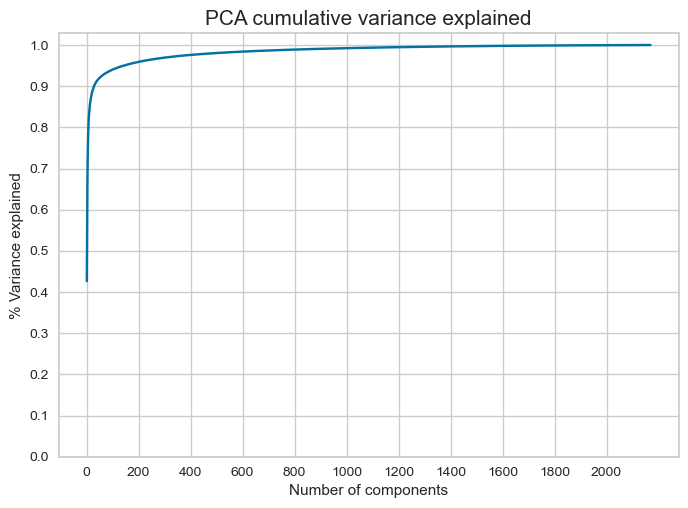

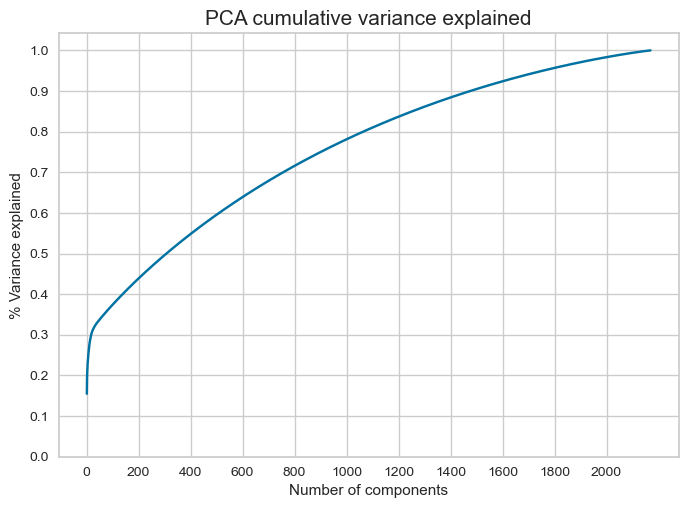

Required #PCs to explained 0.85 of the variance in X: 12
Required #PCs to explained 0.85 of the variance in transformed X: 1253
(2169, 45768)


In [7]:
# We now get the percentage of variance explained by the first principal component for the fitted X and fitted X transformed
print('%variance explained by PC1 for X:', round(pca_x.explained_variance_ratio_[0], 5))
print('%variance explained by PC1 for transformed X:', round(pca_xl.explained_variance_ratio_[0], 5))

# We plot the cumulative variance explained to get an idea of how the explained variance grows as more PCs are included
plot_cumulative_variance_explained(pca_x)
plot_cumulative_variance_explained(pca_xl)

# How many PC should we include to explain a given threshold of variance?
threshold = 0.85
nb_PC_X = np.where(np.cumsum(pca_x.explained_variance_ratio_) >= threshold)[0][0]+1
nb_PC_Xl = np.where(np.cumsum(pca_xl.explained_variance_ratio_) >= threshold)[0][0]+1
print('Required #PCs to explained {} of the variance in X: {}'.format(threshold, nb_PC_X))
print('Required #PCs to explained {} of the variance in transformed X: {}'.format(threshold, nb_PC_Xl))
print(X.shape)

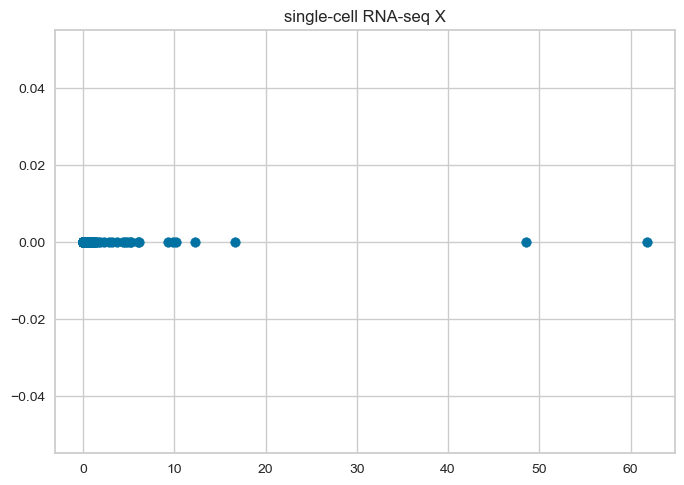

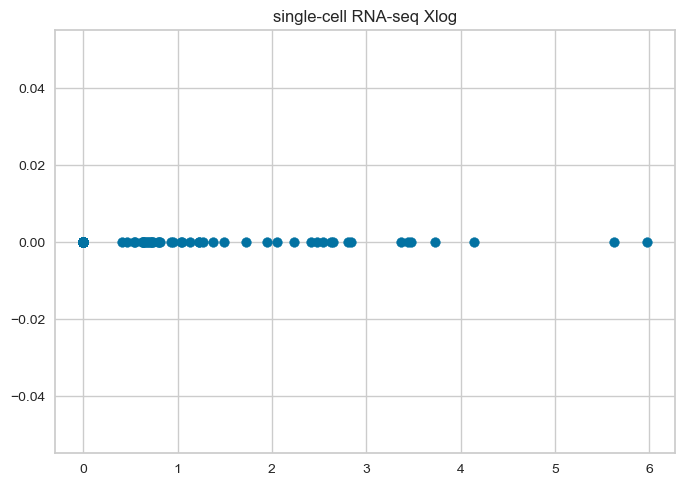

In [8]:
# We'll now visualize the transformed data. First the raw log-transformed data, then the log-transformed data transformed by PCA
plt.scatter(X[:,0], X[:,1])
plt.title('single-cell RNA-seq X')
plt.show()

plt.scatter(Xl[:,0], Xl[:,1])
plt.title('single-cell RNA-seq Xlog')
plt.show()

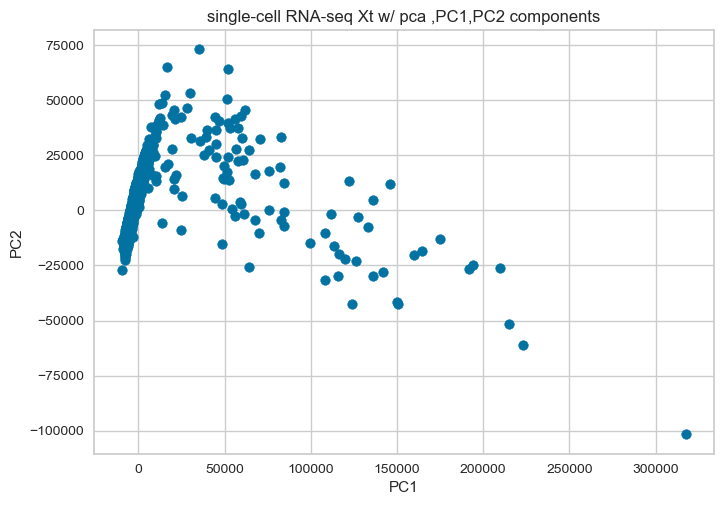

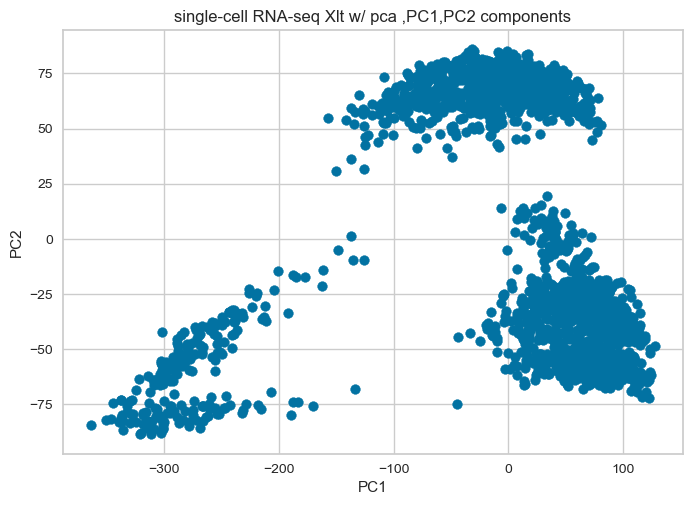

In [9]:
# PCA transformed pca_X_tranformed_pca
# *** BEST ***
plt.scatter(Xt[:,0], Xt[:,1])
plt.title('single-cell RNA-seq Xt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(Xlt[:,0], Xlt[:,1])
plt.title('single-cell RNA-seq Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

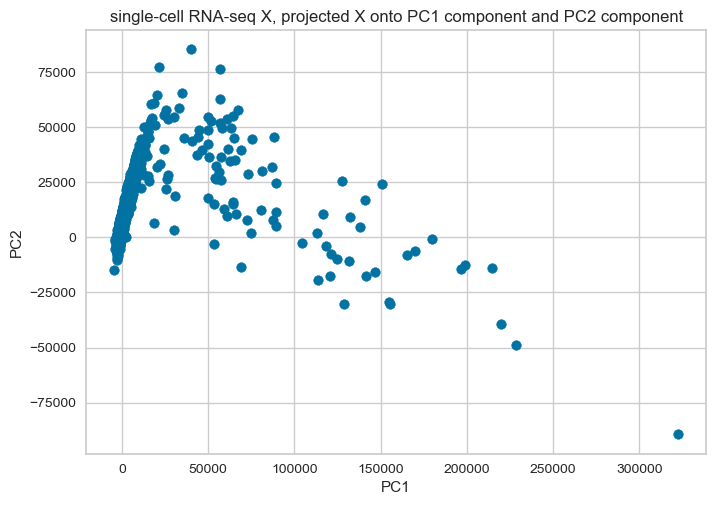

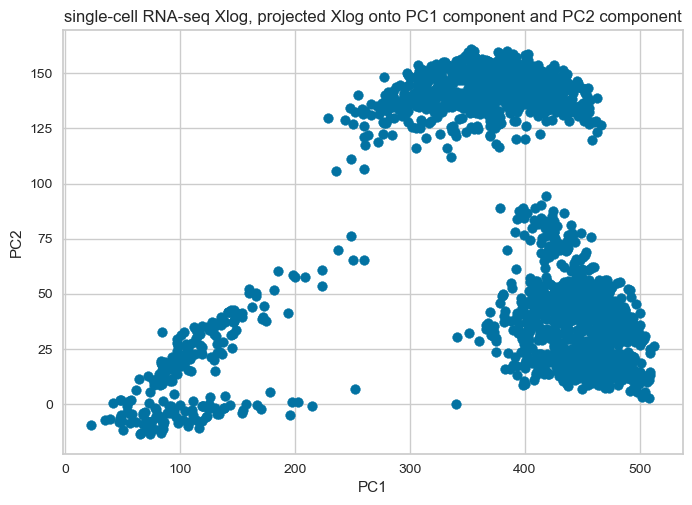

In [10]:
# PCA GRAPH
# Plot the data projected onto PC1 and
projectedX_onto_PC1 = np.matmul(X, pca_x.components_[0])
projectedX_onto_PC2 = np.matmul(X, pca_x.components_[1])
projectedXl_onto_PC1 = np.matmul(Xl, pca_xl.components_[0])
projectedXl_onto_PC2 = np.matmul(Xl, pca_xl.components_[1])
plt.scatter(projectedX_onto_PC1, projectedX_onto_PC2)
plt.title('single-cell RNA-seq X, projected X onto PC1 component and PC2 component')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(projectedXl_onto_PC1, projectedXl_onto_PC2)
plt.title('single-cell RNA-seq Xlog, projected Xlog onto PC1 component and PC2 component')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

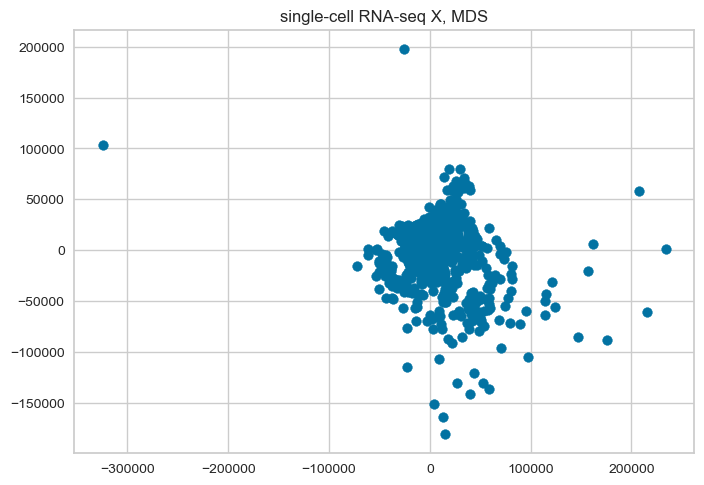

In [11]:
# MSD
# We will now visualize the data set in two dimension by reducing it using MDS (Multidimensional Scaling)
mds_X = MDS(verbose=1, eps=1e-5).fit_transform(X)
plt.scatter(mds_X[:,0], mds_X[:,1])
plt.title('single-cell RNA-seq X, MDS')
plt.show()

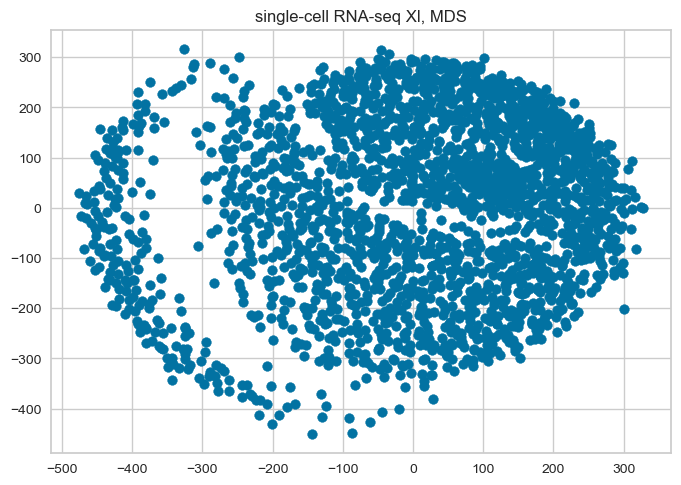

In [12]:
# MSD
# Xl
mds_Xl = MDS(verbose=1, eps=1e-5).fit_transform(Xl)
plt.scatter(mds_Xl[:,0], mds_Xl[:,1])
plt.title('single-cell RNA-seq Xl, MDS')
plt.show()

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


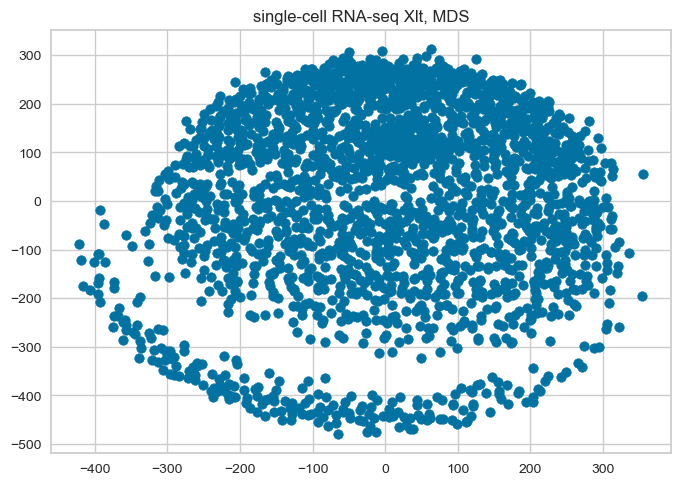

In [13]:
# MSD
# Xl
mds_Xlt = MDS(verbose=1, eps=1e-5).fit_transform(Xlt)
plt.scatter(mds_Xlt[:,0], mds_Xlt[:,1])
plt.title('single-cell RNA-seq Xlt, MDS')
plt.show()

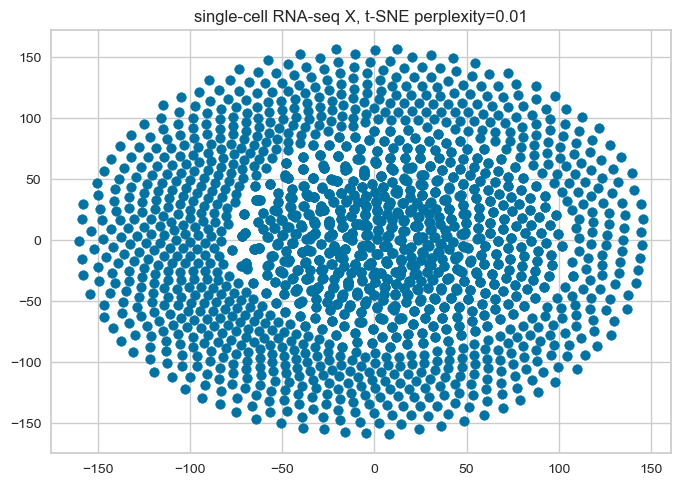

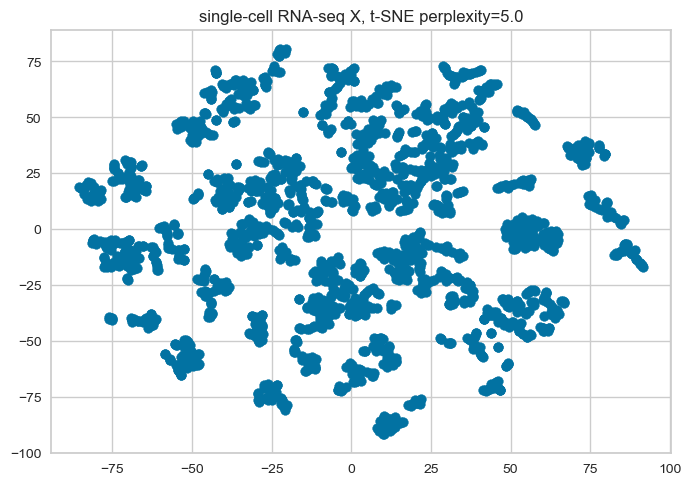

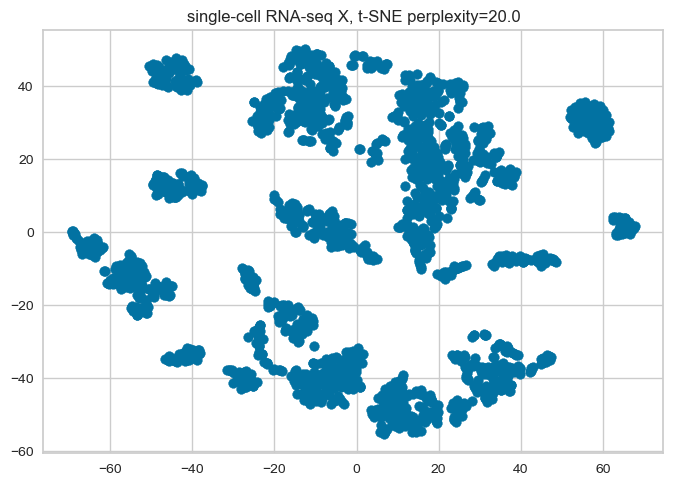

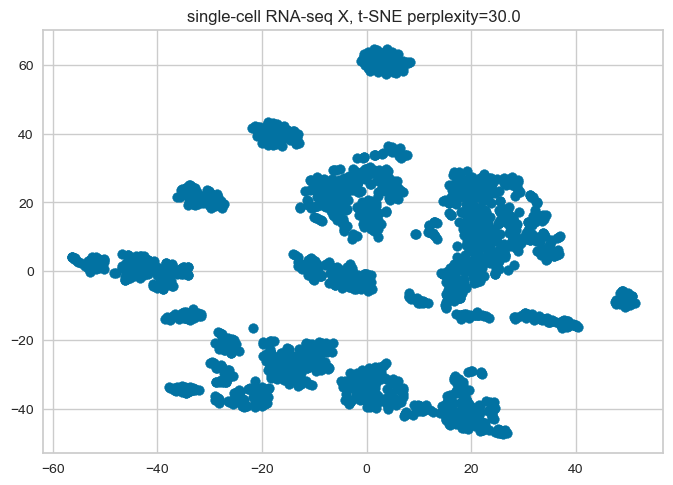

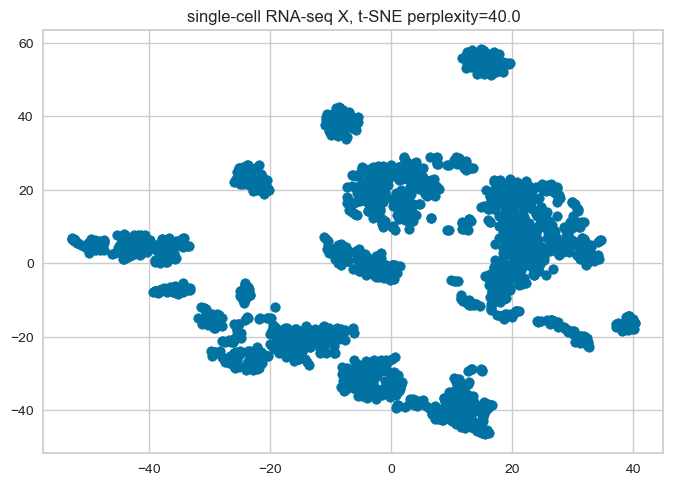

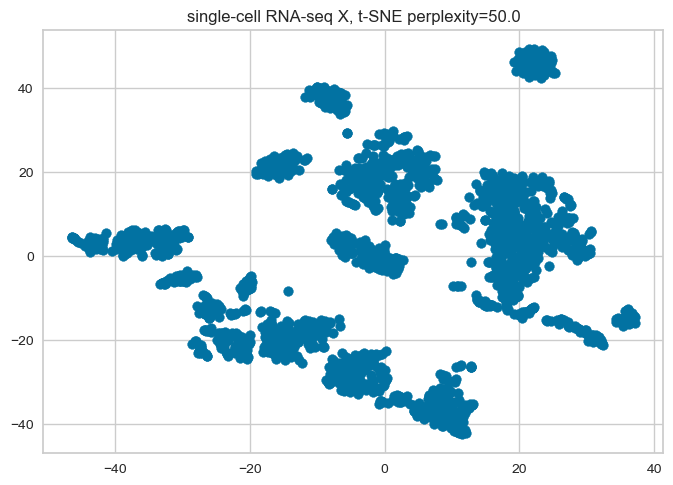

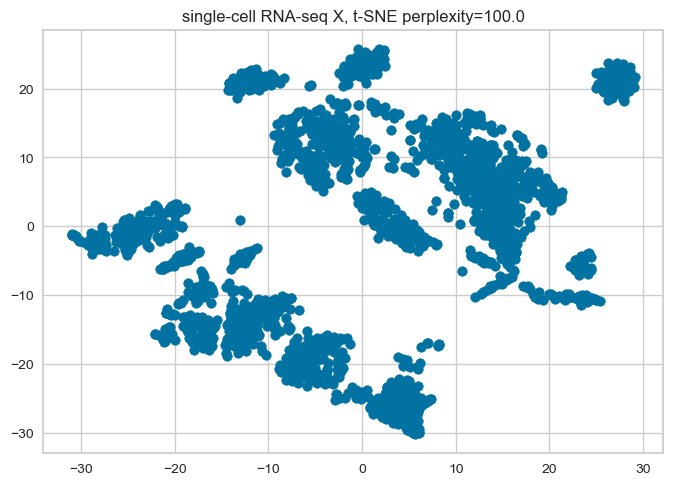

In [14]:
# Now visualize the dataset after reducing it using t-SNE (top 50 PC)
perplexities = [0.01,5.,20.,30.,40.,50.,100.]
for perplexity in perplexities:
    tsne_top_PC = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
    plt.scatter(tsne_top_PC[:,0], tsne_top_PC[:,1])
    plt.title('single-cell RNA-seq X, t-SNE perplexity={}'.format(perplexity))
    plt.show()

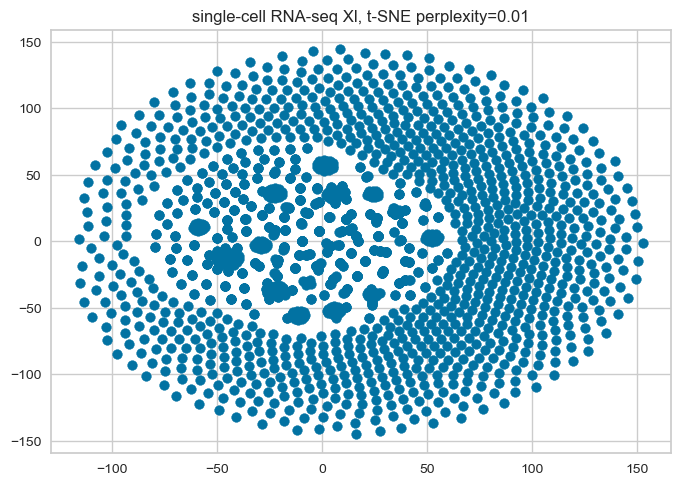

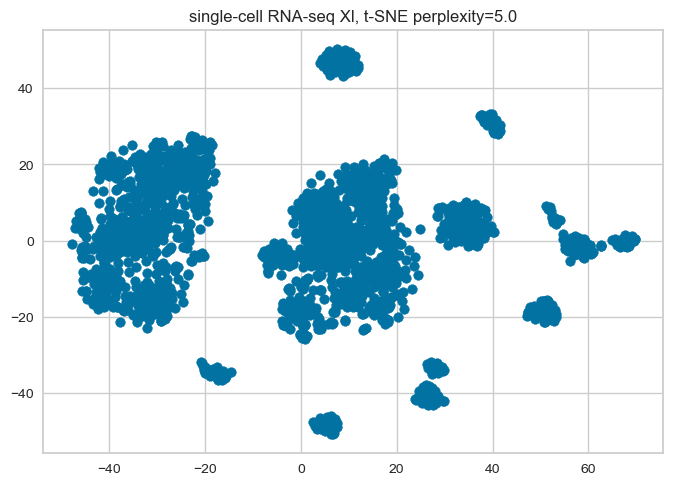

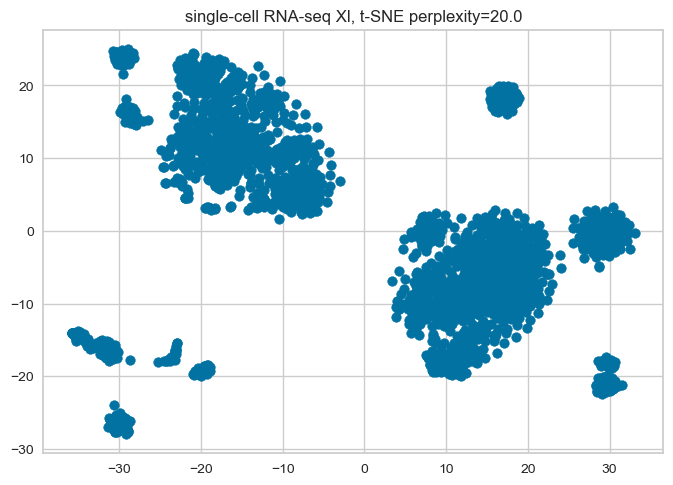

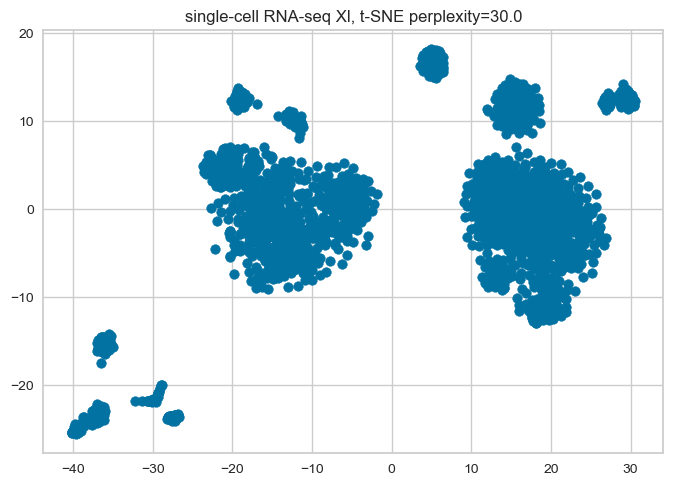

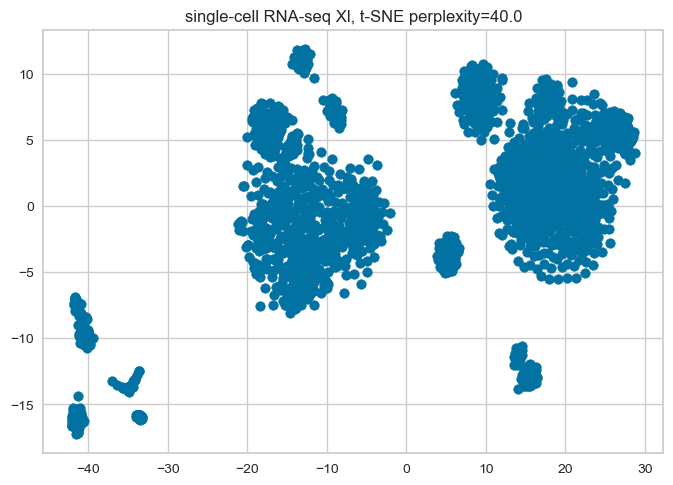

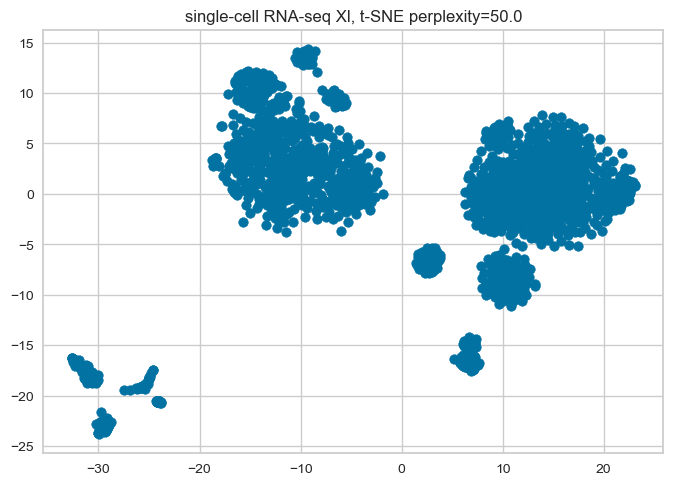

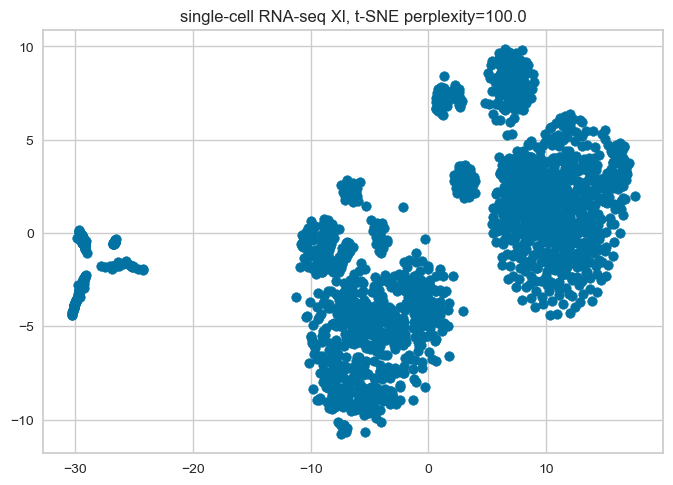

In [15]:
perplexities = [0.01,5.,20.,30.,40.,50.,100.]
for perplexity in perplexities:
    tsne_top_PC = TSNE(n_components=2, perplexity=perplexity).fit_transform(Xl)
    plt.scatter(tsne_top_PC[:,0], tsne_top_PC[:,1])
    plt.title('single-cell RNA-seq Xl, t-SNE perplexity={}'.format(perplexity))
    plt.show()

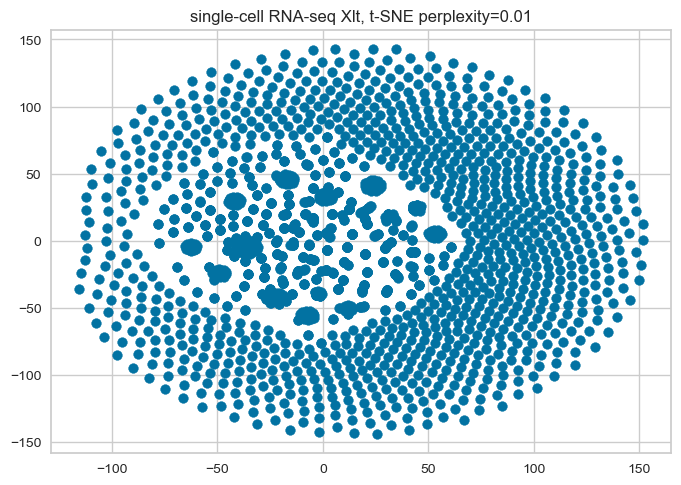

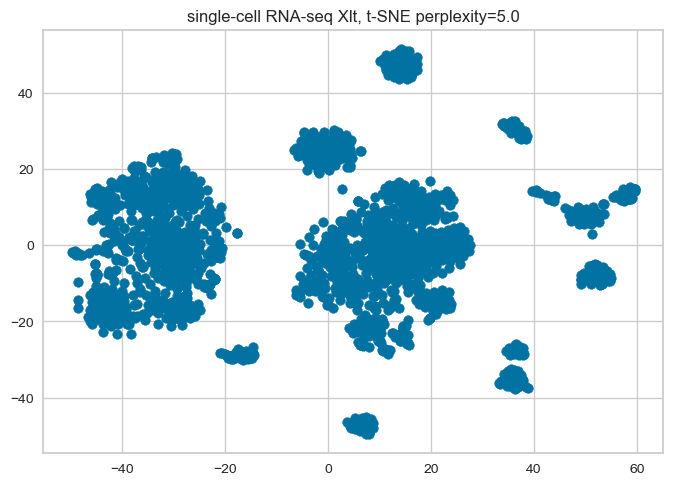

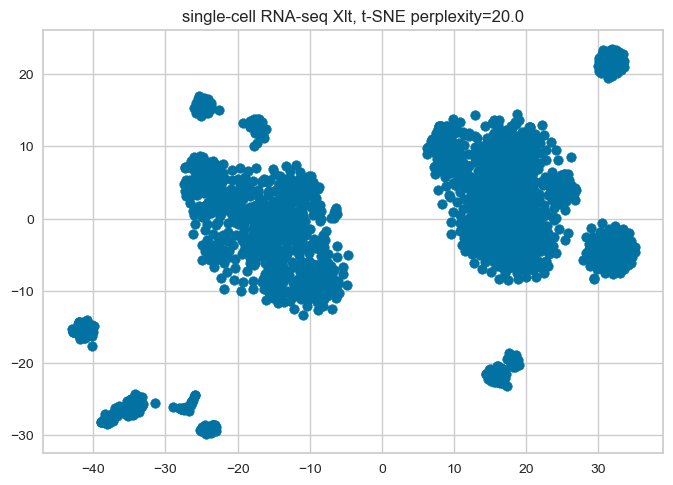

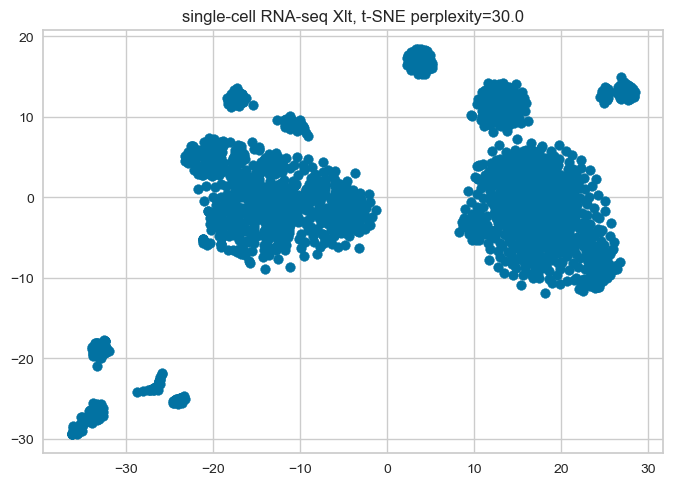

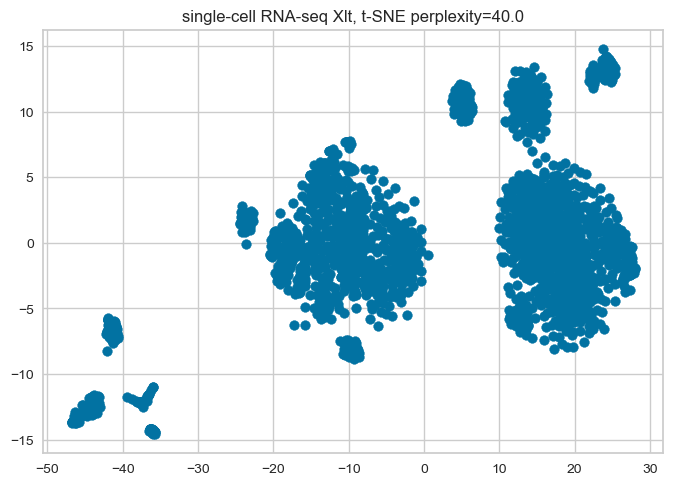

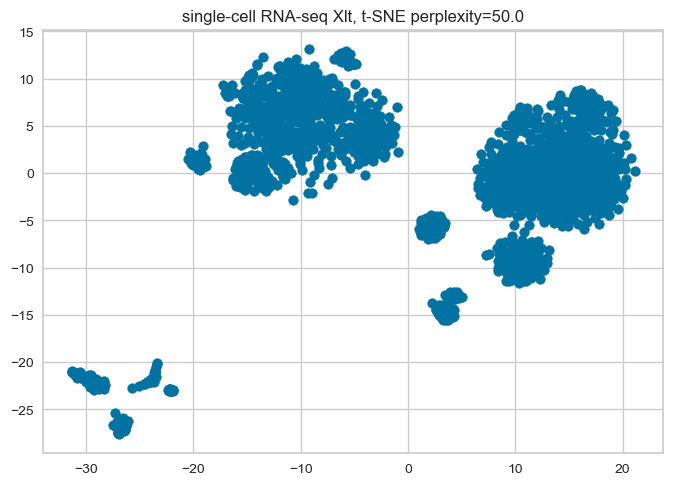

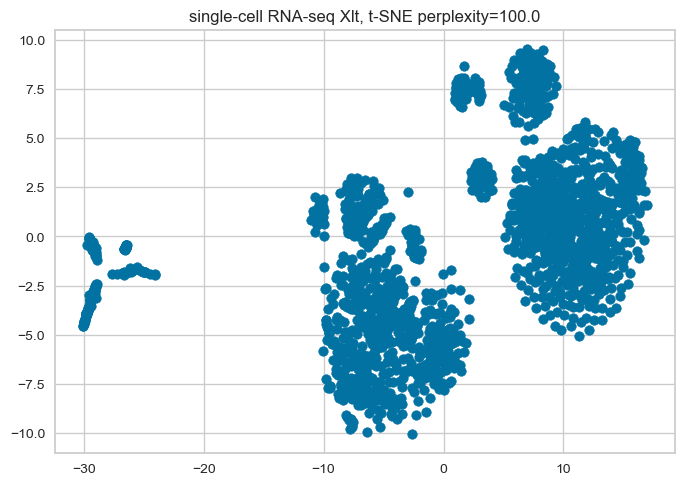

In [16]:
perplexities = [0.01,5.,20.,30.,40.,50.,100.]
for perplexity in perplexities:
    tsne_top_PC = TSNE(n_components=2, perplexity=perplexity).fit_transform(Xlt)
    plt.scatter(tsne_top_PC[:,0], tsne_top_PC[:,1])
    plt.title('single-cell RNA-seq Xlt, t-SNE perplexity={}'.format(perplexity))
    plt.show()

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

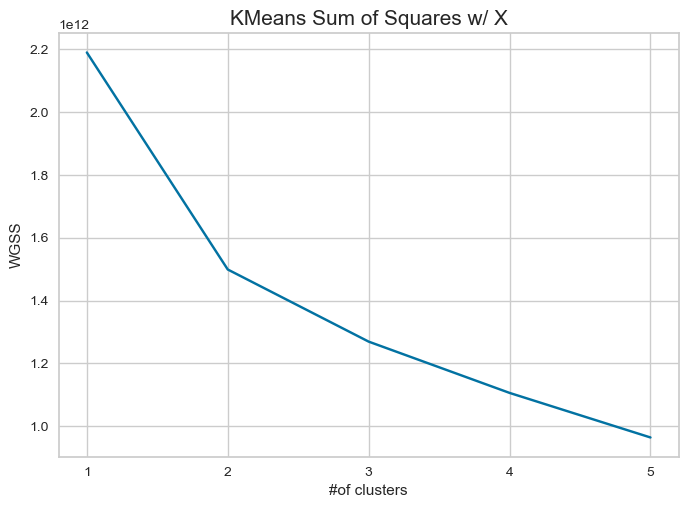

In [17]:
# elbow plot
plt.plot(range(1, 6), [KMeans(i, n_init=50).fit(X).inertia_ for i in range(1, 6)])
plt.xticks(range(1, 6))
plt.xlabel('#of clusters')
plt.ylabel('WGSS')
plt.title('KMeans Sum of Squares w/ X', size=15)
#plt.savefig('./plots/analysis2/brainCells_log-transformed_ElbowPlot')
plt.show()

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

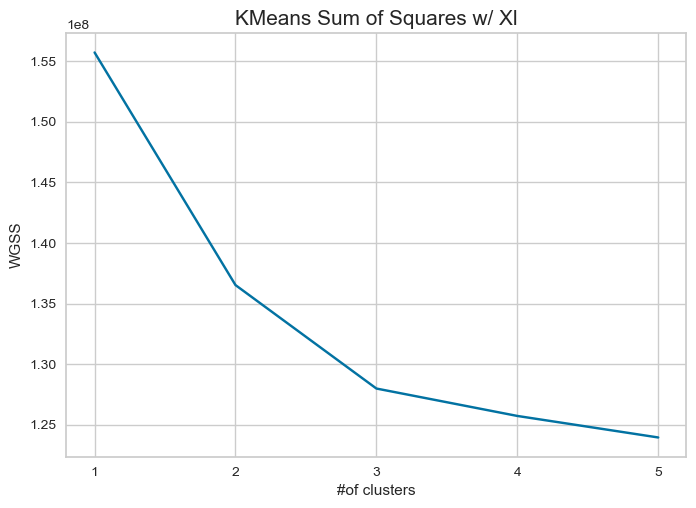

In [18]:
plt.plot(range(1, 6), [KMeans(i, n_init=50).fit(Xl).inertia_ for i in range(1, 6)])
plt.xticks(range(1, 6))
plt.xlabel('#of clusters')
plt.ylabel('WGSS')
plt.title('KMeans Sum of Squares w/ Xl', size=15)
#plt.savefig('./plots/analysis2/brainCells_log-transformed_ElbowPlot')
plt.show()

In [19]:
start_time = time.perf_counter()
n_clusters = 3
clustering3X = KMeans(n_clusters=n_clusters, n_init=50)
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")
X3 = clustering3X.fit(X)
elapsed_time = time.perf_counter() - elapsed_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")
colors3X = np.array(resolve_colors(n_clusters, 'yellowbrick'))

Elapsed time: 0.0002 seconds


C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Elapsed time: 313647.7193 seconds


In [20]:
start_time = time.perf_counter()
n_clusters = 35
clustering5X = KMeans(n_clusters=n_clusters, n_init=50)
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")
X5 = clustering5X.fit(X)
colors5X = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

Elapsed time: 0.0001 seconds


C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Elapsed time: 157.2506 seconds


In [21]:
# As both the elbow and silhouette plots agree on 3 being a right number of clusters,
# we will perform KMeans with  3 clusters.
start_time = time.perf_counter()
n_clusters = 3
clustering3Xt = KMeans(n_clusters=n_clusters, n_init=50)
Xt3 = clustering3Xt.fit(Xt)
colors3Xt = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

start_time = time.perf_counter()
n_clusters = 3
clustering3Xl = KMeans(n_clusters=n_clusters, n_init=50)
Xl3 = clustering3Xl.fit(Xl)
colors3Xl = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

start_time = time.perf_counter()
n_clusters = 3
clustering3Xlt = KMeans(n_clusters=n_clusters, n_init=50)
Xlt3 = clustering3Xlt.fit(Xlt)
colors3Xlt = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")1

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Elapsed time: 1.5855 seconds


C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Elapsed time: 8.6755 seconds


C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Elapsed time: 19.8996 seconds


C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Elapsed time: 138.2040 seconds


C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Elapsed time: 1.0701 seconds


C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Elapsed time: 7.2278 seconds


In [49]:
start_time = time.perf_counter()
n_clusters = 36
clustering5Xt = KMeans(n_clusters=n_clusters, n_init=50)
Xt5 = clustering5Xt.fit(Xt)
colors5Xt = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

start_time = time.perf_counter()
n_clusters = 36
clustering5Xl = KMeans(n_clusters=n_clusters, n_init=50)
Xl5 = clustering5Xl.fit(Xl)
colors5Xl = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

start_time = time.perf_counter()
n_clusters = 36
clustering5Xlt = KMeans(n_clusters=n_clusters, n_init=50)
Xlt5 = clustering5Xlt.fit(Xlt)
colors5Xlt = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Elapsed time: 7.9440 seconds


C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Elapsed time: 130.6741 seconds


C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Elapsed time: 7.2016 seconds


In [22]:
print(colors3X)
print(colors5X)
print(colors3Xlt)
print(colors5Xlt)
print(clustering3X.labels_)
print(clustering5X.labels_)
print(clustering3Xl.labels_)
print(clustering5Xl.labels_)
print(clustering3Xlt.labels_)
print(clustering5Xlt.labels_)

[[0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]]
[[0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]
 [0.84314 0.78039 0.01176]
 [0.53333 0.79216 0.8549 ]
 [0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]
 [0.84314 0.78039 0.01176]
 [0.53333 0.79216 0.8549 ]
 [0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]
 [0.84314 0.78039 0.01176]
 [0.53333 0.79216 0.8549 ]
 [0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]
 [0.84314 0.78039 0.01176]
 [0.53333 0.79216 0.8549 ]
 [0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]
 [0.84314 0.78039 0.01176]
 [0.53333 0.79216 0.8549 ]
 [0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]


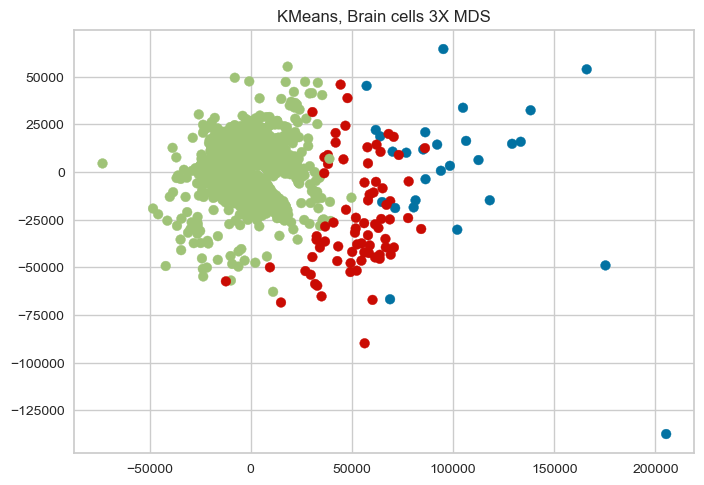

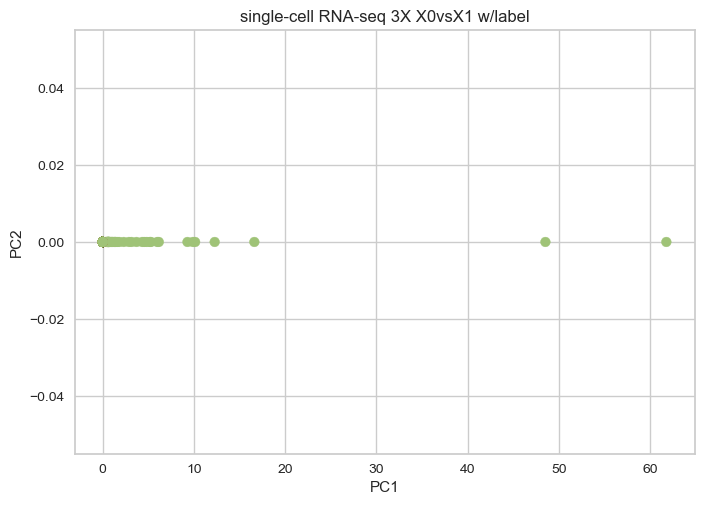

Elapsed time: 119.3058 seconds


In [23]:
start_time = time.perf_counter()
mds_brain_cells3X = MDS(n_components=3, eps=1e-7).fit_transform(X)
plt.scatter(mds_brain_cells3X[:,0], mds_brain_cells3X[:,1], c=colors3X[clustering3X.labels_])
plt.title('KMeans, Brain cells 3X MDS')
plt.show()

plt.scatter(X[:,0], X[:,1], c=colors3X[clustering3X.labels_])
plt.title('single-cell RNA-seq 3X X0vsX1 w/label')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

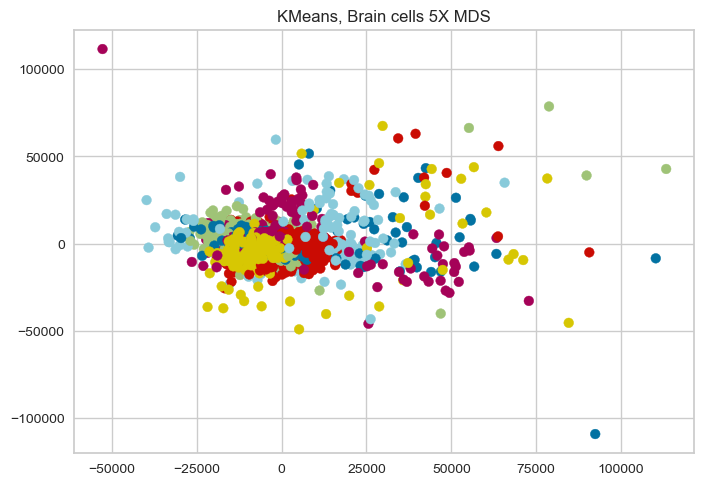

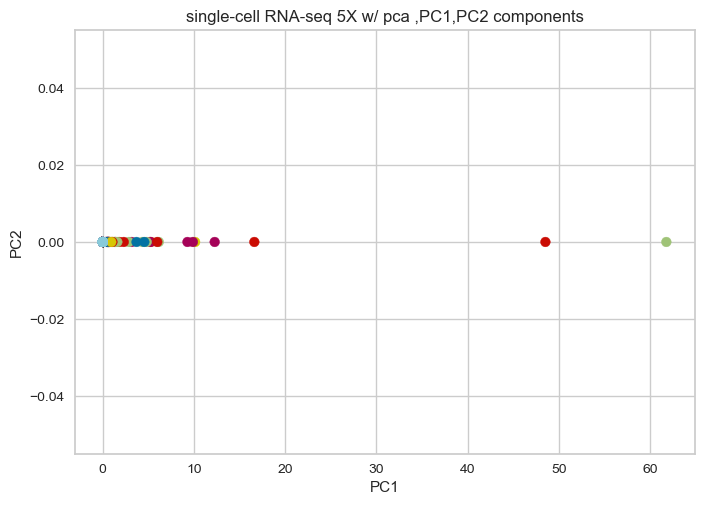

Elapsed time: 122.5727 seconds


In [24]:
start_time = time.perf_counter()
mds_brain_cells5X = MDS(n_components=5, eps=1e-7).fit_transform(X)
plt.scatter(mds_brain_cells5X[:,0], mds_brain_cells5X[:,1], c=colors5X[clustering5X.labels_])
plt.title('KMeans, Brain cells 5X MDS')
plt.show()

plt.scatter(X[:,0], X[:,1], c=colors5X[clustering5X.labels_])
plt.title('single-cell RNA-seq 5X w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

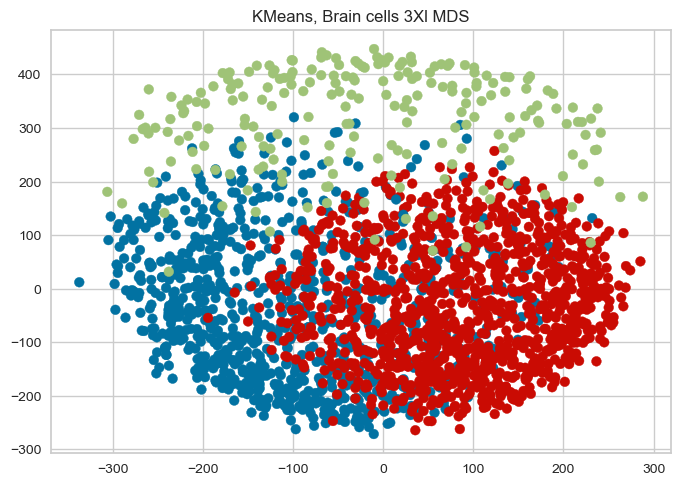

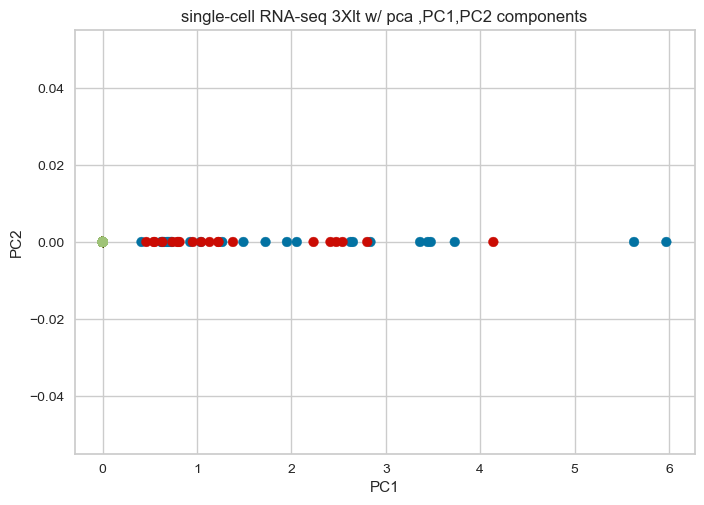

In [25]:
mds_brain_cells3Xl = MDS(n_components=3, eps=1e-7).fit_transform(Xl)
plt.scatter(mds_brain_cells3Xl[:,0], mds_brain_cells3Xl[:,1], c=colors3Xl[clustering3Xl.labels_])
plt.title('KMeans, Brain cells 3Xl MDS')
plt.show()

plt.scatter(Xl[:,0], Xl[:,1], c=colors3Xl[clustering3Xl.labels_])
plt.title('single-cell RNA-seq 3Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

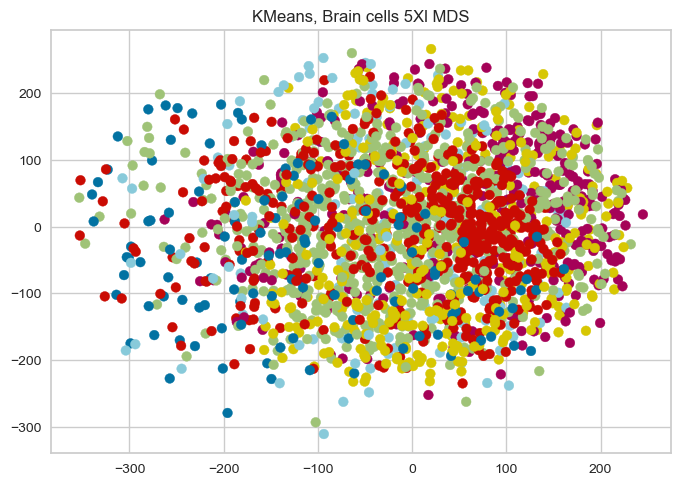

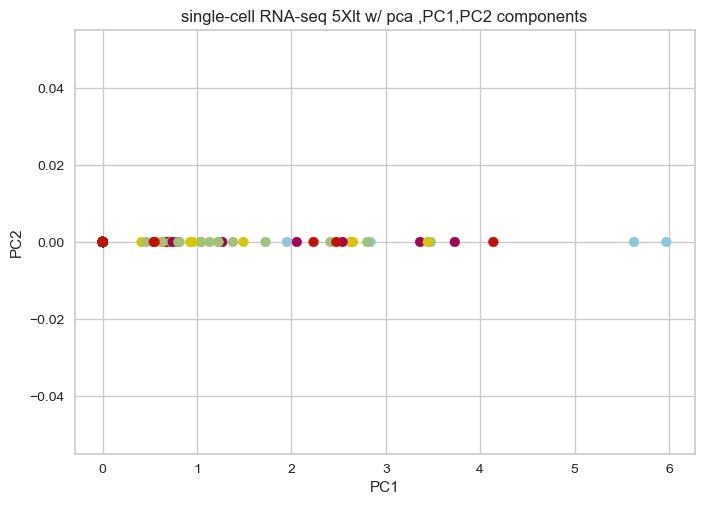

In [26]:
mds_brain_cells5Xl = MDS(n_components=5, eps=1e-7).fit_transform(Xl)
plt.scatter(mds_brain_cells5Xl[:,0], mds_brain_cells5Xl[:,1], c=colors5Xl[clustering5Xl.labels_])
plt.title('KMeans, Brain cells 5Xl MDS')
plt.show()

plt.scatter(Xl[:,0], Xl[:,1], c=colors5Xl[clustering5Xl.labels_])
plt.title('single-cell RNA-seq 5Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


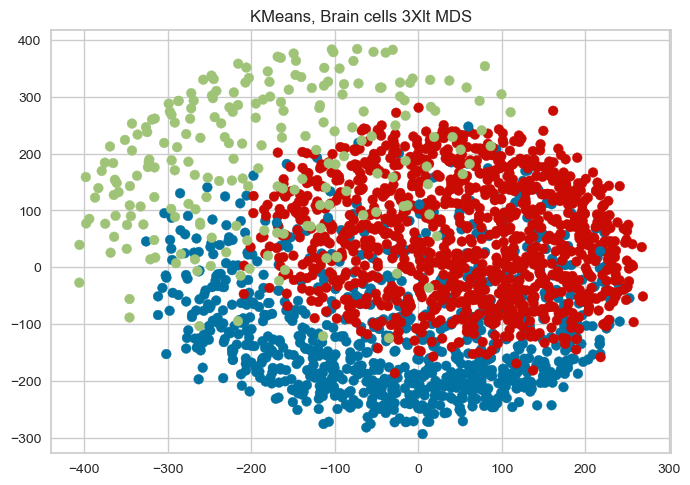

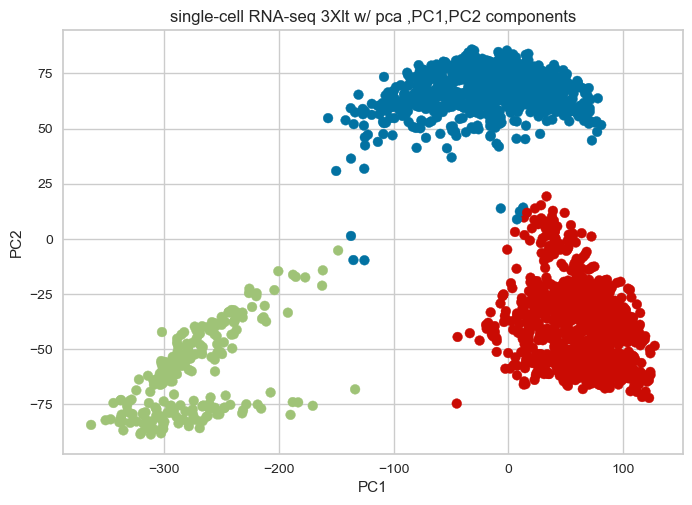

In [27]:
mds_brain_cells3Xlt = MDS(n_components=3, eps=1e-7).fit_transform(Xlt)
plt.scatter(mds_brain_cells3Xlt[:,0], mds_brain_cells3Xlt[:,1], c=colors3Xlt[clustering3Xlt.labels_])
plt.title('KMeans, Brain cells 3Xlt MDS')
plt.show()

plt.scatter(Xlt[:,0], Xlt[:,1], c=colors3Xlt[clustering3Xlt.labels_])
plt.title('single-cell RNA-seq 3Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


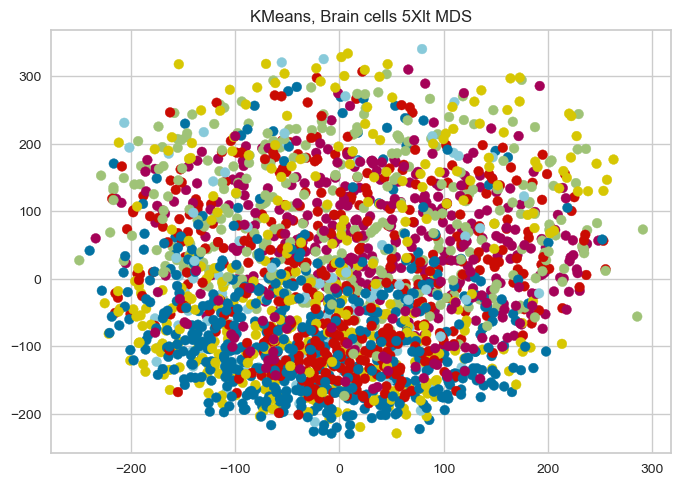

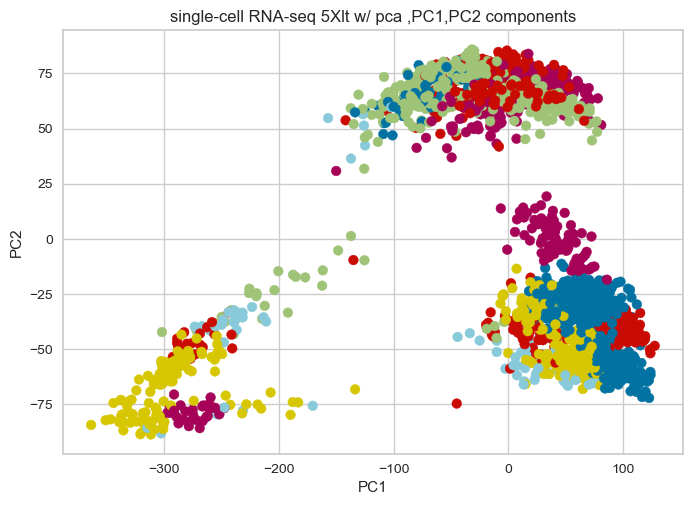

In [28]:
mds_brain_cells5Xlt = MDS(n_components=5, eps=1e-7).fit_transform(Xlt)
plt.scatter(mds_brain_cells5Xlt[:,0], mds_brain_cells5Xlt[:,1], c=colors5Xlt[clustering5Xlt.labels_])
plt.title('KMeans, Brain cells 5Xlt MDS')
plt.show()

plt.scatter(Xlt[:,0], Xlt[:,1], c=colors5Xlt[clustering5Xlt.labels_])
plt.title('single-cell RNA-seq 5Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


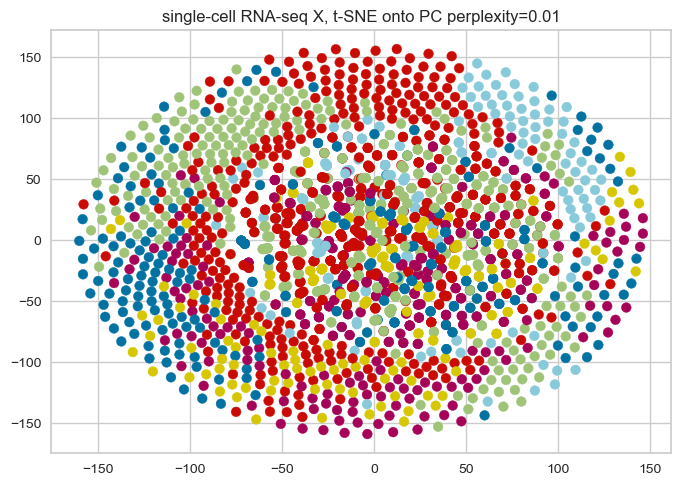

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


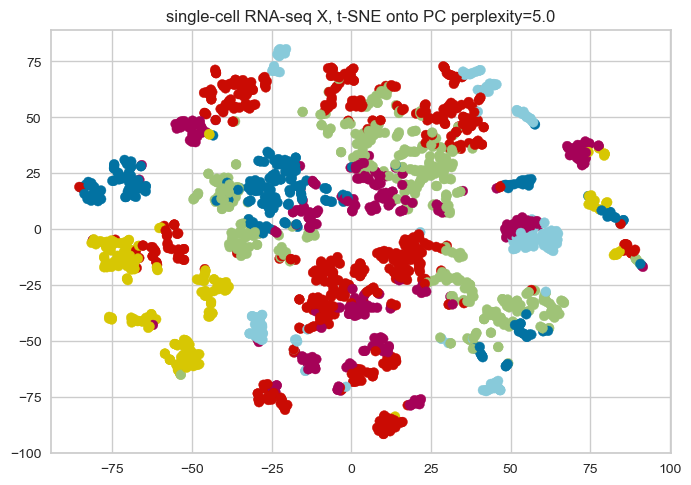

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


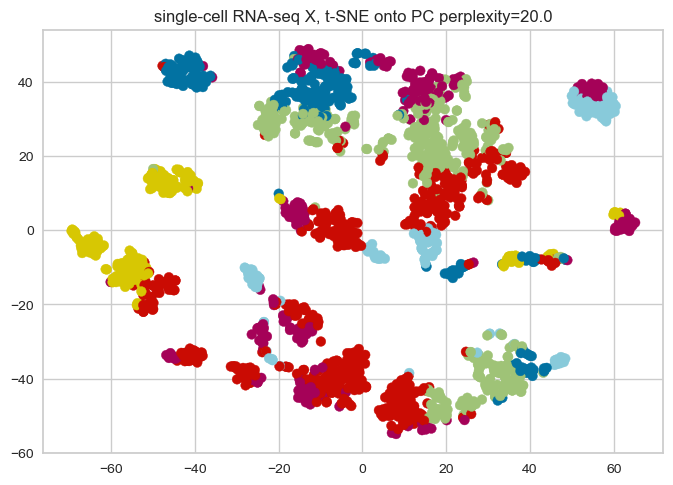

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


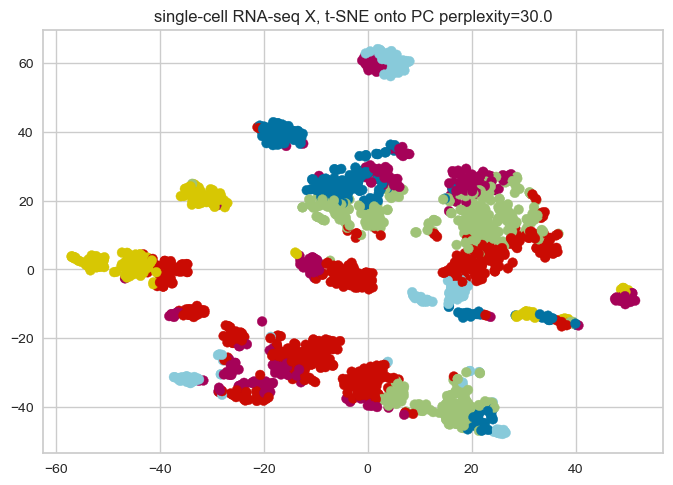

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


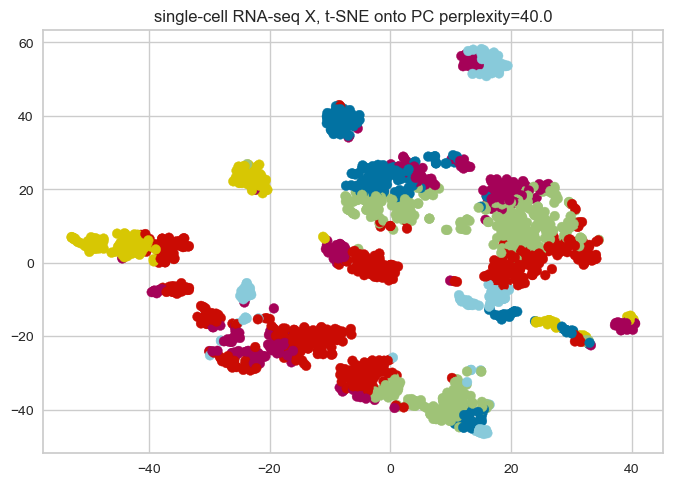

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


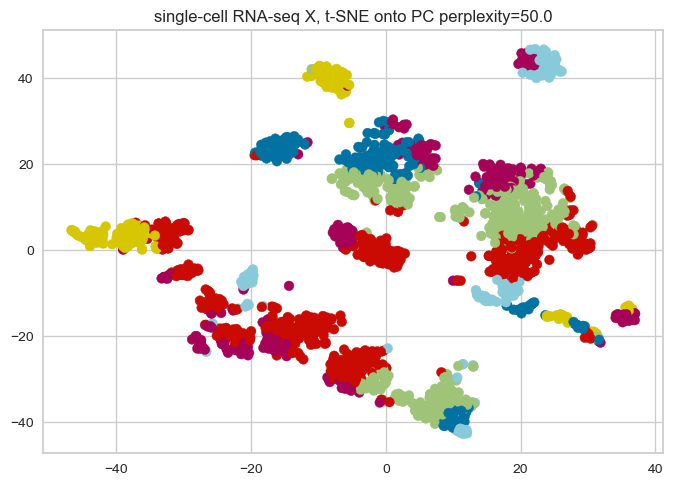

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


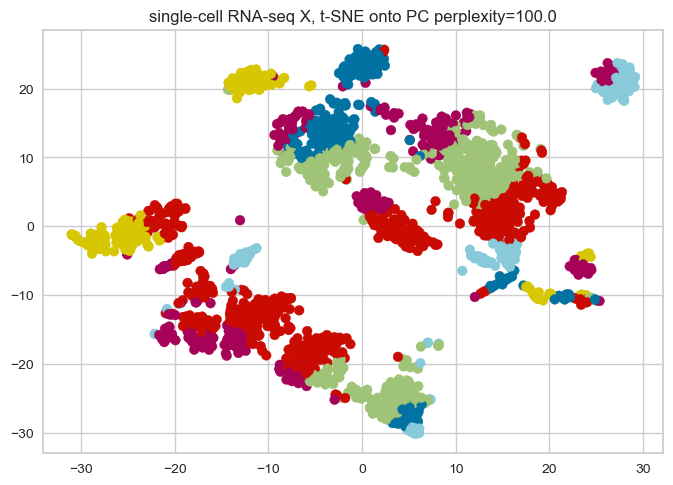

In [29]:
# Explore the effect of the perplexity parameter on t-SNE
perplexities = [0.01,5.,20.,30.,40.,50.,100.]
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
    plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')
    plt.title('single-cell RNA-seq X, t-SNE onto PC perplexity={}'.format(perplexity))
    plt.show()

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


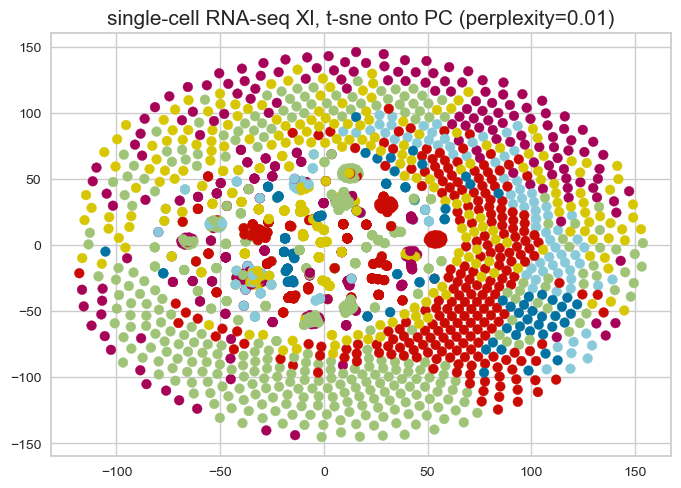

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


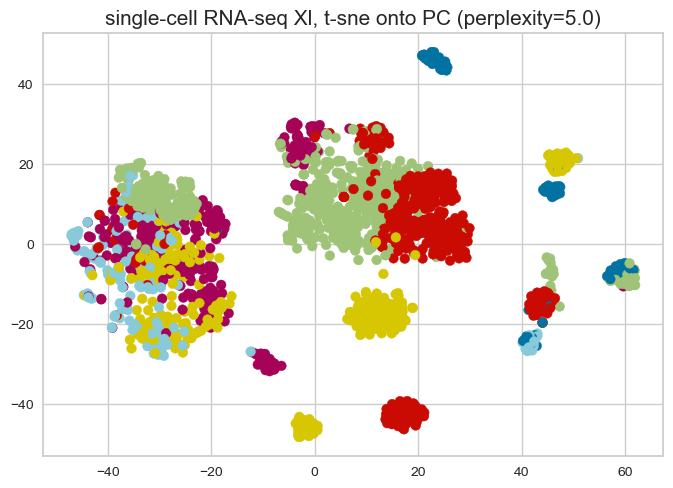

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


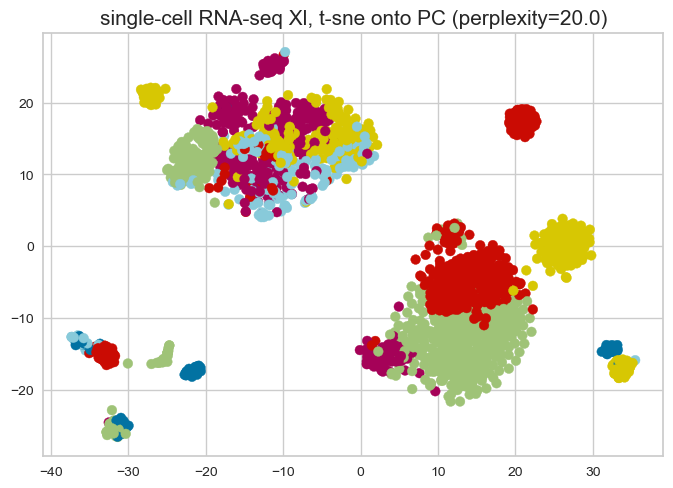

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


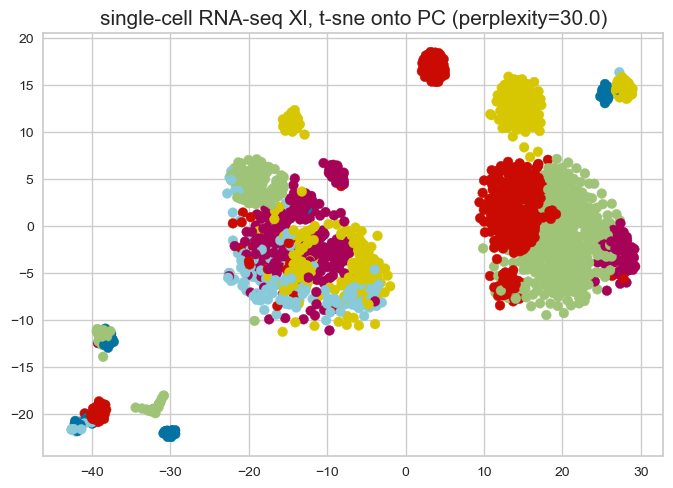

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


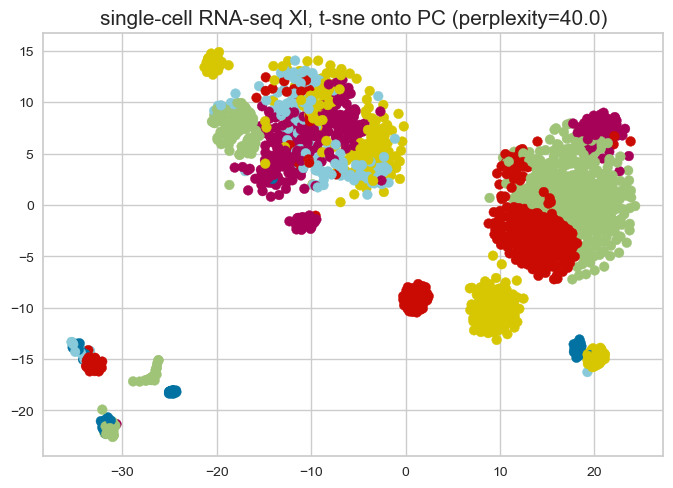

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


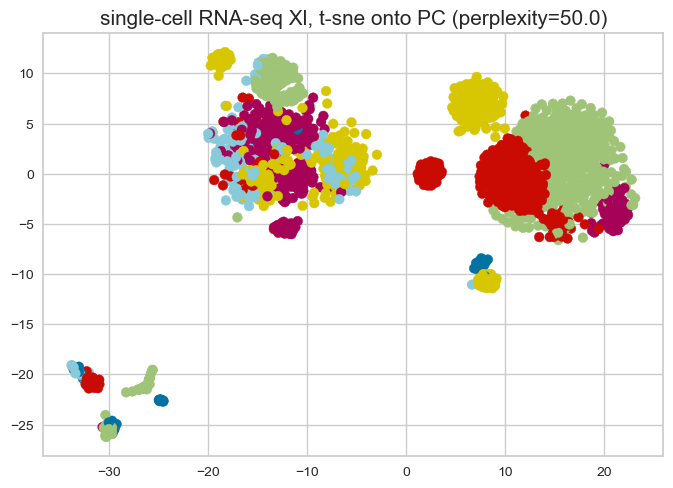

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


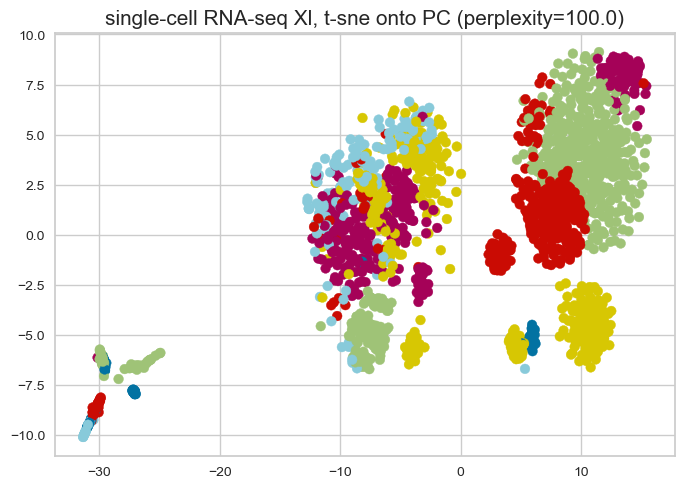

In [30]:
perplexities = np.array([0.01,5.,20.,30.,40.,50.,100.])
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity).fit_transform(Xl)
    plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')
    plt.title('single-cell RNA-seq Xl, t-sne onto PC (perplexity={})'.format(perplexity), size=15)
    plt.show()

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


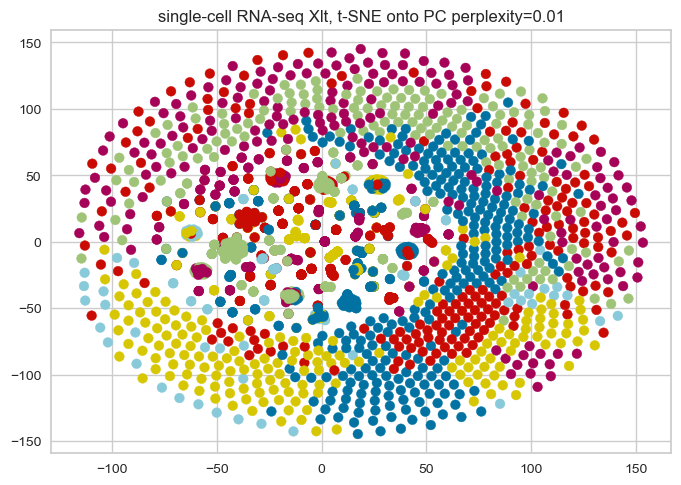

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


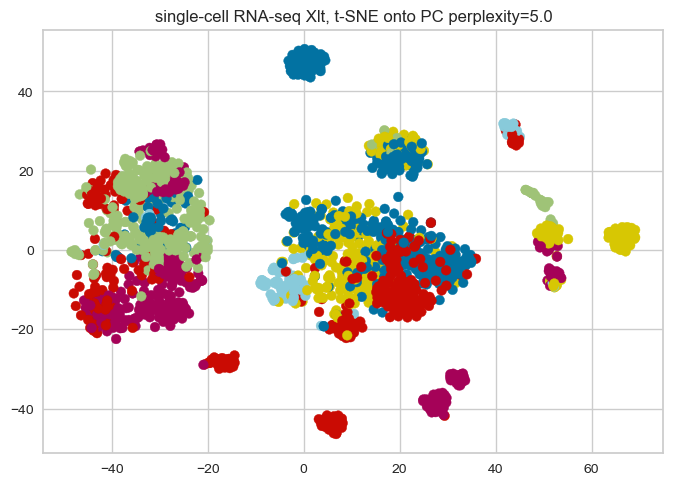

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


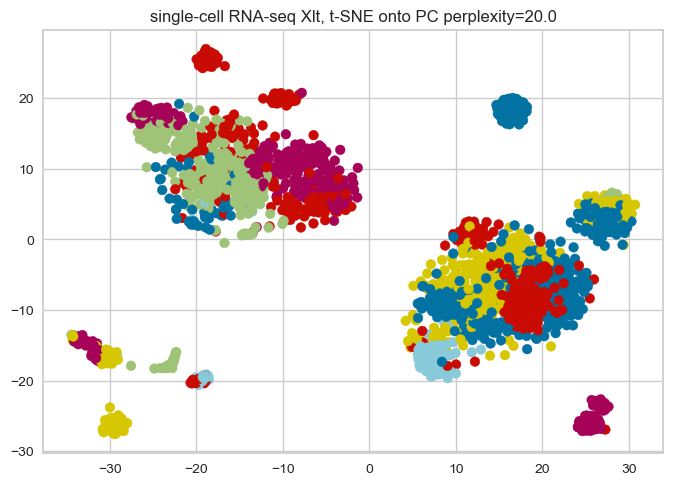

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


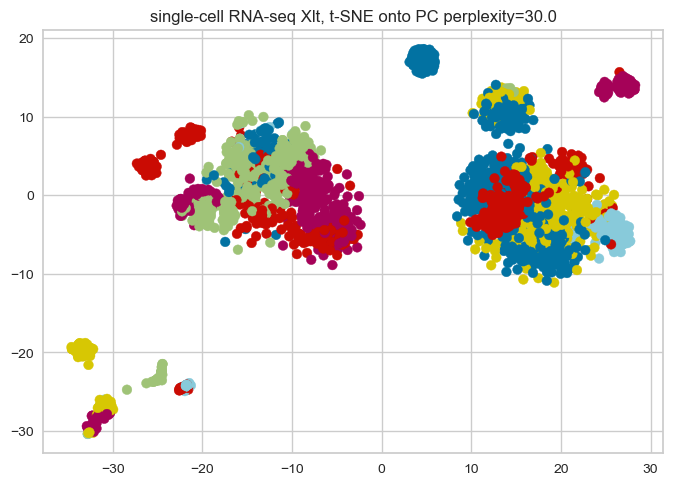

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


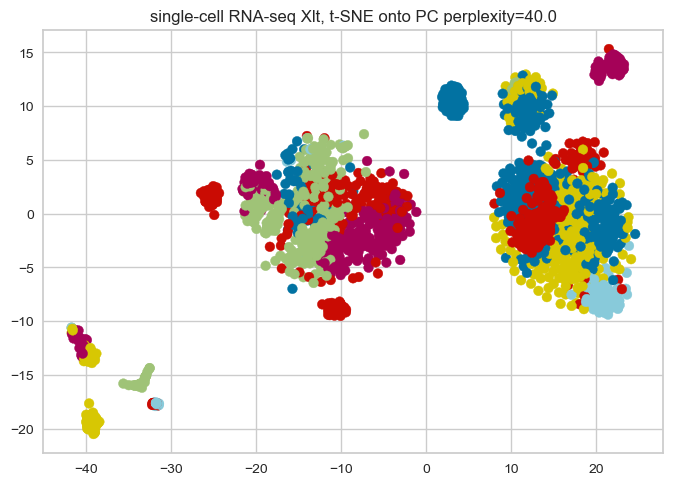

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


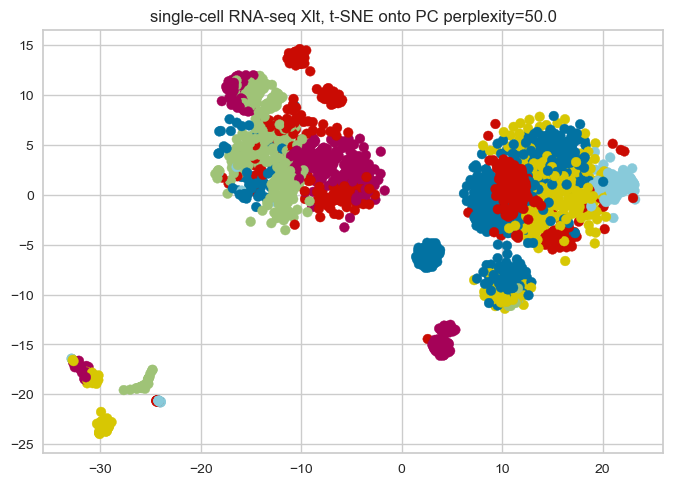

C:\Users\chito\AppData\Local\Temp\ipykernel_60128\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


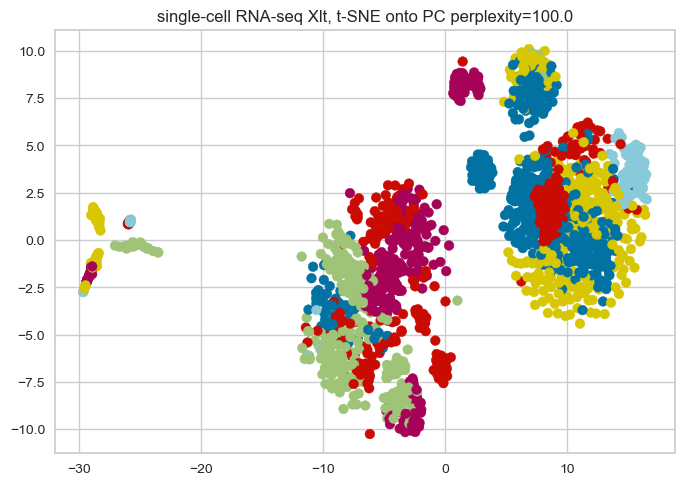

In [31]:
perplexities = [0.01,5.,20.,30.,40.,50.,100.]
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity).fit_transform(Xlt)
    plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')
    plt.title('single-cell RNA-seq Xlt, t-SNE onto PC perplexity={}'.format(perplexity))
    plt.show()

In [32]:
print("TODO")

TODO


In [50]:
# REGRESSION
# Clustering is already done. We will use clustering5Xt 
print("Summary of Data for regression")

labels5X = clustering5X.labels_
labels5Xt = clustering5Xt.labels_
labels5Xl = clustering5Xl.labels_
labels5Xlt = clustering5Xlt.labels_

centro5X = clustering5X.cluster_centers_
centro5Xt = clustering5Xt.cluster_centers_
centro5Xl = clustering5Xl.cluster_centers_
centro5Xlt = clustering5Xlt.cluster_centers_

features5X = clustering5X.n_features_in_
features5Xt = clustering5Xt.n_features_in_
features5Xl = clustering5Xl.n_features_in_
features5Xlt = clustering5Xlt.n_features_in_

print("labels")
print(labels5X)
print(labels5Xt)
print(labels5Xl)
print(labels5Xlt)

print("centro")
print(centro5X)
print(centro5Xt)
print(centro5Xl)
print(centro5Xlt)

print("features")
print(features5X)
print(features5Xt)
print(features5Xl)
print(features5Xlt)

Summary of Data for regression
labels
[20 27 27 ... 23 23 23]
[13 13 13 ...  9 23 23]
[20 32  1 ... 21  3  3]
[26 29 29 ... 14 14 17]
centro
[[  0.        0.      121.48421 ...   0.        0.        0.     ]
 [  0.08137   0.      101.54483 ...   0.        0.        0.     ]
 [  0.        0.       17.87697 ...   0.        0.        0.     ]
 ...
 [  0.        0.       93.34399 ...   0.        0.        0.     ]
 [  0.00544   0.       82.09728 ...   0.        0.        0.     ]
 [  0.        0.       93.9802  ...   0.        0.        0.     ]]
[[ -1488.68294   5387.808     1337.6549  ...      0.6322      -1.60612
       0.     ]
 [206668.76818 -38032.46004  -5997.78961 ...     -0.55335     -1.03816
       0.     ]
 [ -5877.65663  -8017.38752  -3402.5911  ...     -0.21059     -0.22465
       0.     ]
 ...
 [ 44535.08839  37547.93214   7341.92259 ...     -0.25142     -0.35075
       0.     ]
 [ 23080.46179  12877.25699   2605.16354 ...      0.19802      0.28999
       0.     ]
 [ -6110.35

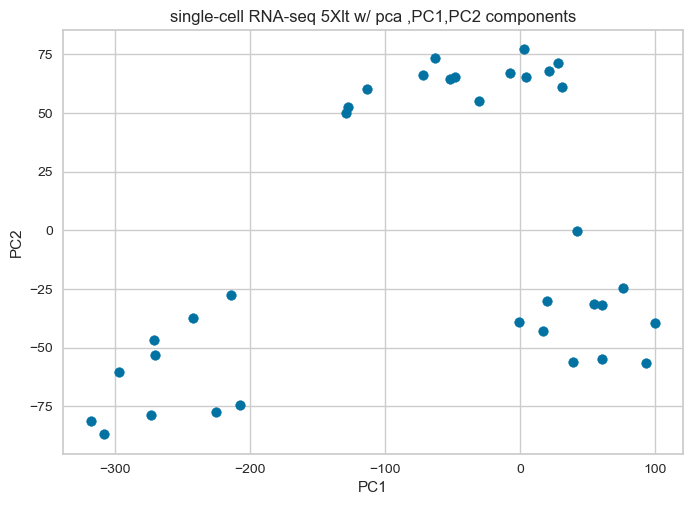

In [34]:
plt.scatter(centro5Xlt[:,0], centro5Xlt[:,1])
plt.title('single-cell RNA-seq 5Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [35]:
#n_clusters = 5
#clustering = KMeans(n_clusters=5, n_init=50).fit(X_transformed)
#clustering_pca = KMeans(n_clusters=5, n_init=50).fit(X_transformed_pca)
#labels = clustering.labels_
#labels_pca = clustering_pca.labels_

In [52]:
# Separate into train/test data
start_time = time.perf_counter()
X_train_X, X_test_X, y_train_X, y_test_X = train_test_split(X, labels5X, test_size=0.33, shuffle=True)

modelX = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
#modelXl1 = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l1', solver='liblinear', max_iter=5000, multi_class='ovr')
#modelXelast = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='elasticnet', solver='saga', l1_ratios=[0.25, 0.5, 0.75], multi_class='ovr', max_iter=5000)  ## Takes a loooong time

modelX.fit(X_train_X, y_train_X)
#modelXl1.fit(X_train_X, y_train_X)
#modelXelast.fit(X_train_X, y_train_X)
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Elapsed time: 854.1185 seconds


In [53]:
# Separate into train/test data
X_train_Xl, X_test_Xl, y_train_Xl, y_test_Xl = train_test_split(Xl, labels5Xl, test_size=0.33, shuffle=True)

modelXl = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
#model = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l1', solver='liblinear', max_iter=5000, multi_class='ovr')
#model = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='elasticnet', solver='saga', l1_ratios=[0.25, 0.5, 0.75], multi_class='ovr', max_iter=5000)  ## Takes a loooong time

modelXl.fit(X_train_Xl, y_train_Xl)

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], cv=5, max_iter=5000,
                     multi_class='ovr')

In [54]:
# Separate into train/test data
X_train_Xlt, X_test_Xlt, y_train_Xlt, y_test_Xlt = train_test_split(Xlt, labels5Xlt, test_size=0.33, shuffle=True)

modelXlt = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
# model = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l1', solver='liblinear', max_iter=5000, multi_class='ovr')
# model = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='elasticnet', solver='saga', l1_ratios=[0.25, 0.5, 0.75], multi_class='ovr', max_iter=5000)  ## Takes a loooong time

modelXlt.fit(X_train_Xlt, y_train_Xlt)

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], cv=5, max_iter=5000,
                     multi_class='ovr')

In [55]:
score1X= modelX.score(X_test_X, y_test_X)
print(score1X)
score1Xl = modelXl.score(X_test_Xl, y_test_Xl)
print(score1Xl)
score1Xlt = modelXlt.score(X_test_Xlt, y_test_Xlt)
print(score1Xlt)

0.8142458100558659
0.8715083798882681
0.8784916201117319


In [56]:
n_coef = 100
#print(modelX.coef_)
sum_coef_X = np.sum(np.abs(modelX.coef_), axis=0)
#print(sum_coef_X)
top_coef_X = sum_coef_X.argsort()[::-1][:n_coef]
print("top_coef")
print(top_coef_X)

random_features_X = np.random.choice(X.shape[1], n_coef, replace=False)
max_variance_features_X = np.var(X, axis=0).argsort()[::-1][:n_coef]
print(max_variance_features_X)

n_coef = 100
#print(modelXl.coef_)
sum_coef_Xl = np.sum(np.abs(modelXl.coef_), axis=0)
#print(sum_coef_Xl)
top_coef_Xl = sum_coef_Xl.argsort()[::-1][:n_coef]
print("top_coef")
print(top_coef_Xl)

n_coef = 100
#print(modelXlt.coef_)
sum_coef_Xlt = np.sum(np.abs(modelXlt.coef_), axis=0)
#print(sum_coef_Xlt)
top_coef_Xlt = sum_coef_Xlt.argsort()[::-1][:n_coef]
print("top_coef")
print(top_coef_Xlt)

random_features_Xl = np.random.choice(Xl.shape[1], n_coef, replace=False)
max_variance_features_Xl = np.var(Xl, axis=0).argsort()[::-1][:n_coef]
print(max_variance_features_Xl)
random_features_Xlt = np.random.choice(Xlt.shape[1], n_coef, replace=False)
max_variance_features_Xlt = np.var(Xlt, axis=0).argsort()[::-1][:n_coef]
print(max_variance_features_Xlt)

top_coef
[32023  3484  4300 43520 42788  4369  3138 40981 34463  4688 40094 39674
 37125 36985 32315  2791 40962  4303  8586  3528 24483 38015 41846 24393
 23490 41852 44094  4356 39861 41447 35138 40972  4368  3486 32259 38999
 45732  5250  4100 40166  5730  8472 31896 23382 38467  5983  3095 34844
 39676 34309 34453 38484 41265 25325 34372 40545 39125 41655  7473  3502
 43570  8511  5551 31421 43620  5341 37104  8283 23641  6034  5510 24224
  3096 24380 37844 32173  7397  5809 43531 37743  8567 24301 40096 34462
 25326 45084 31506 44038 34911 41531 32312 39126 32005 34373  5739 40556
  8559  3526 34406  6864]
[38255 32023 44094  4100  3113 37532  4369  3114 40962 34844 37125  8472
 25324 41531 38286  4368 44784 40166 42788 39126 40981 38999  4688  8586
 36985 32315  4303 45732 31892 34372 39674 32259  4356 41899  5250  3486
  4439 31893 35138 34453  5551 39861  2791 41846 37542 43283  5849 43520
 34309  5809  5390 32202 23490 40797 31896  4300 25325  3502 41264  3483
 38396 41898 378

In [57]:
start_time = time.perf_counter()
set_features = [top_coef_X, random_features_X, max_variance_features_X]

scores = []
for features in set_features:
    x = X[:, np.array(features)]
    X_train, X_test, y_train, y_test = train_test_split(x, labels5X, test_size=0.33, shuffle=True)

    modelX = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
    modelX.fit(X_train, y_train)

    model_score = modelX.score(X_test, y_test)
    scores.append(model_score)

print(np.round(np.asarray(scores), 5))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[0.75978 0.25419 0.74581]
Elapsed time: 908.5272 seconds


In [58]:
set_features = [top_coef_Xl, random_features_Xl, max_variance_features_Xl]

scores = []
for features in set_features:
    x = Xl[:, np.array(features)]
    X_train, X_test, y_train, y_test = train_test_split(x, labels5Xl, test_size=0.33, shuffle=True)

    modelXl = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
    modelXl.fit(X_train, y_train)

    model_score = modelXl.score(X_test, y_test)
    scores.append(model_score)

print(np.round(np.asarray(scores), 5))

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than

[0.79609 0.48324 0.81564]


In [59]:
set_features = [top_coef_Xlt, random_features_Xlt, max_variance_features_Xlt]

scores = []
for features in set_features:
    x = Xlt[:, np.array(features)]
    X_train, X_test, y_train, y_test = train_test_split(x, labels5Xlt, test_size=0.33, shuffle=True)

    modelXlt = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
    modelXlt.fit(X_train, y_train)

    model_score = modelXlt.score(X_test, y_test)
    scores.append(model_score)

print(np.round(np.asarray(scores), 5))

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than

[0.90084 0.19553 0.91899]


In [60]:
# Evaluate features by training a logistic regression model on the training, evaluate on test.
X_train_e = np.load("C:/data/p2_evaluation/X_train.npy")
y_train_e = np.load("C:/data/p2_evaluation/y_train.npy")
X_test_e = np.load("C:/data/p2_evaluation/X_test.npy")
y_test_e = np.load("C:/data/p2_evaluation/y_test.npy")
print(X_train_e.shape)
print(X_test_e.shape)
print(y_train_e)
print(y_test_e)

(1077, 45768)
(1108, 45768)
[ 0  0  0 ... 35 35 35]
[ 0  0  0 ... 35 35 35]


In [63]:
Xl_train_e = np.log2(X_train_e + 1)
Xl_test_e = np.log2(X_test_e + 1)


In [65]:
# Separate into train/test data
# X_train_X, X_test_X, y_train_X, y_test_X = train_test_split(X, labels5X, test_size=0.33, shuffle=True)

model_e = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000).fit(Xl_train_e, y_train_e)


C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [67]:
score_e = model_e.score(Xl_test_e, y_test_e)
print(score_e)

0.9259927797833934


In [70]:
n_coef = 100
sum_coef_X = np.sum(np.abs(model_e.coef_), axis=0)
top_coef_X = sum_coef_X.argsort()[::-1][:n_coef]
print("top_coef")
print(top_coef_X)
random_features_X = np.random.choice(X.shape[1], n_coef, replace=False)
max_variance_features_X = np.var(X, axis=0).argsort()[::-1][:n_coef]
print(max_variance_features_X)

top_coef
[36985 41846  4928 31889 31421 34844  4688  5849 42363 41385  4356 38467
 41711 34516  4084 31662  5838  5809 42749  2603 40160  5609 38860 34517
  4441 41728 34789  2770 37125  4987  7473 44094 38779 36892  5252  5741
 38332  5551 24590 44937 31919 45653  4357 38846 40045  4832  5752 40736
 34890 25648  4509 35140 36889 25442 41265 44774 38551 24483 38705 41533
 36823 45112  5866  7897 35059 41195  5523 43431 38865  4354 36986 42610
  6626 40043  4927 37400  4331  6040 41386  6724 38605 34840  5562 38363
 32424 25324 34900  4433  3768 34798 23659  2795  8511 24336 41860  8001
  4498 24592 24302 41899]
[38255 32023 44094  4100  3113 37532  4369  3114 40962 34844 37125  8472
 25324 41531 38286  4368 44784 40166 42788 39126 40981 38999  4688  8586
 36985 32315  4303 45732 31892 34372 39674 32259  4356 41899  5250  3486
  4439 31893 35138 34453  5551 39861  2791 41846 37542 43283  5849 43520
 34309  5809  5390 32202 23490 40797 31896  4300 25325  3502 41264  3483
 38396 41898 378

In [71]:
set_features = [top_coef_Xlt, random_features_Xlt, max_variance_features_Xlt]

scores_test_e = []
scores_train_e = []

for features in set_features:
    x_train_e = Xl_train_e[:, np.array(features)]
    x_test_e = Xl_test_e[:, np.array(features)]
    model = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
    model.fit(x_train_e, y_train_e)
    model_score = model.score(x_test_e, y_test_e)
    scores_test_e.append(model_score)

print(np.round(np.asarray(scores_test_e), 5))
print(np.round(np.asarray(scores_train_e), 5))

C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chito\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


[0.39801 0.31949 0.42419]
[]


Number of PCs: 10


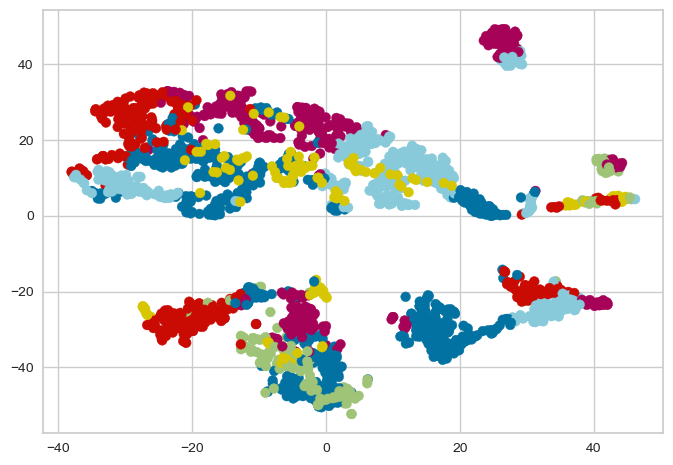

Number of PCs: 50


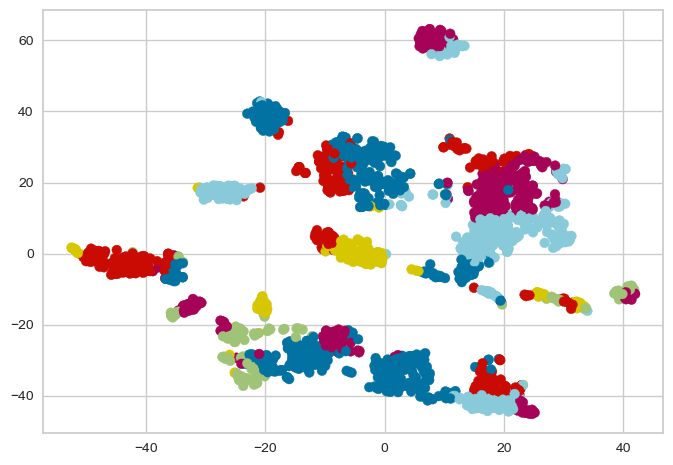

Number of PCs: 100


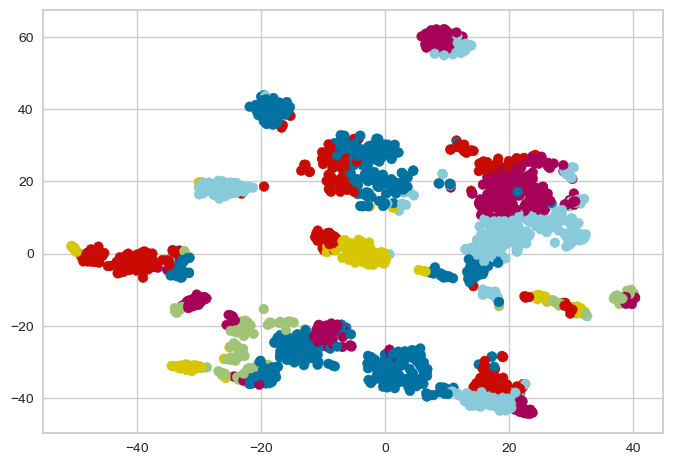

Number of PCs: 250


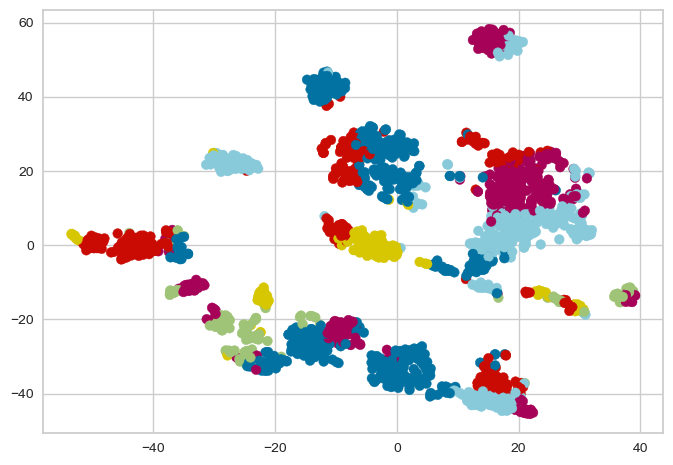

Number of PCs: 500


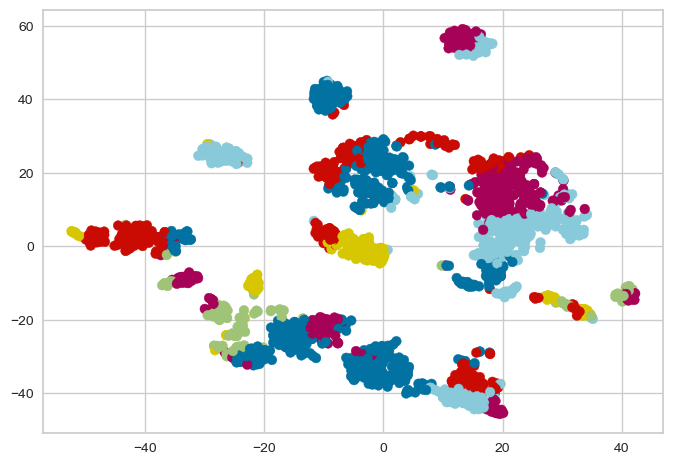

In [83]:
for n_pcs in [10,50,100,250,500]:
    print("Number of PCs:", n_pcs)
    z_tsne = TSNE(n_components=2,perplexity=40).fit_transform(Xt[:,0:n_pcs])
    plt.scatter(z_tsne[:,0],z_tsne[:,1], c=colors5Xt[clustering5Xt.labels_])
    plt.show()

Number of PCs: 10


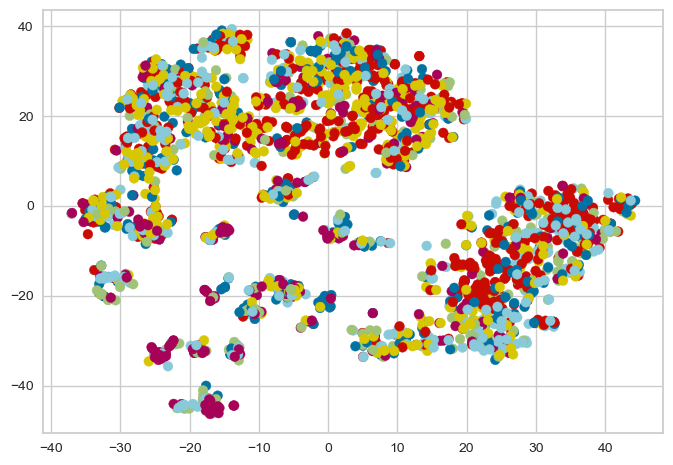

Number of PCs: 50


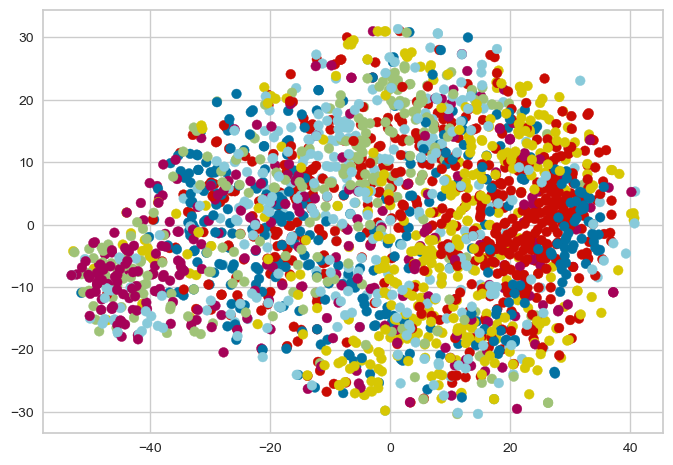

Number of PCs: 100


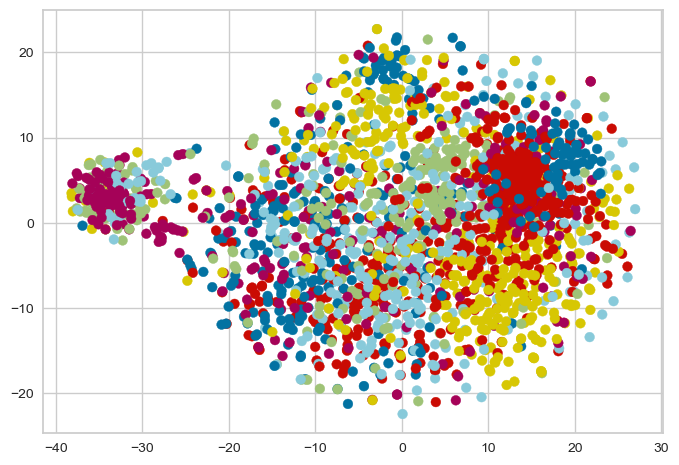

Number of PCs: 250


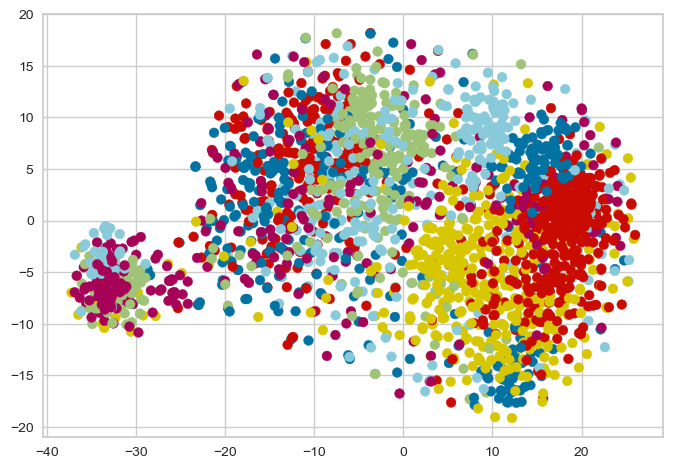

Number of PCs: 500


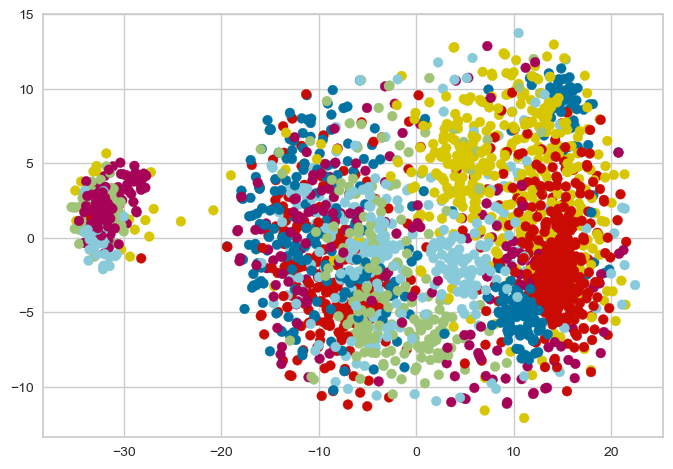

In [82]:
for n_pcs in [10,50,100,250,500]:
    print("Number of PCs:", n_pcs)
    z_tsne = TSNE(n_components=2,perplexity=40).fit_transform(Xl[:,0:n_pcs])
    plt.scatter(z_tsne[:,0],z_tsne[:,1], c=colors5Xl[clustering5Xl.labels_])
    plt.show()

Number of PCs: 10


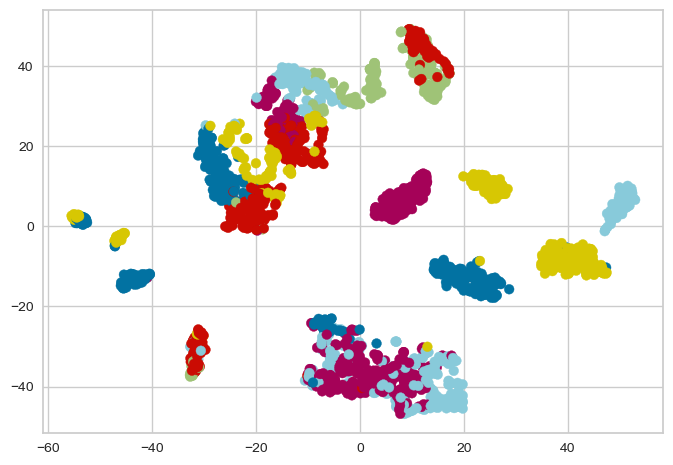

Number of PCs: 50


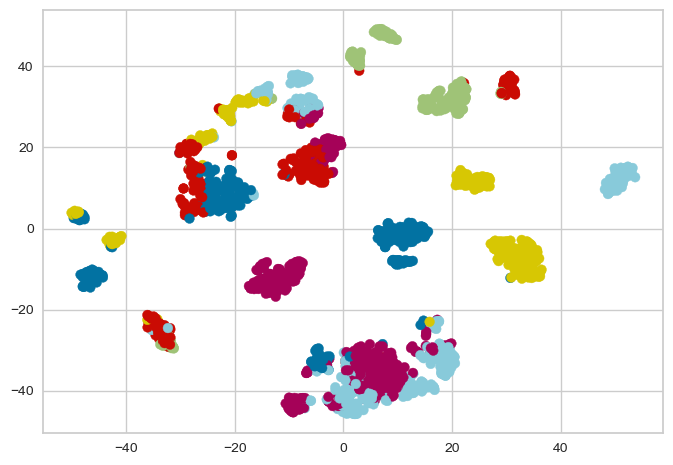

Number of PCs: 100


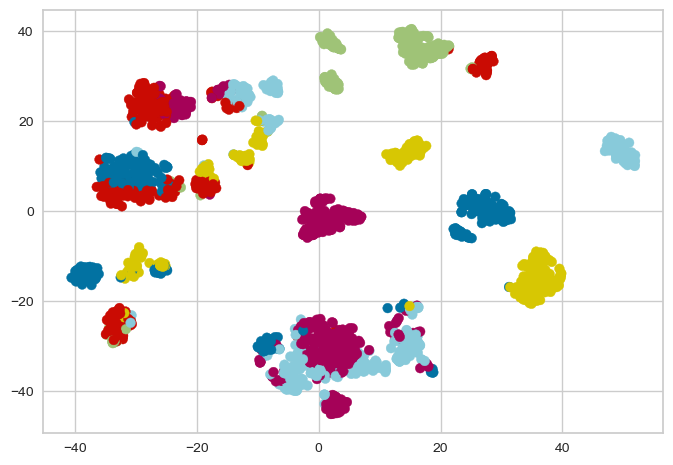

Number of PCs: 250


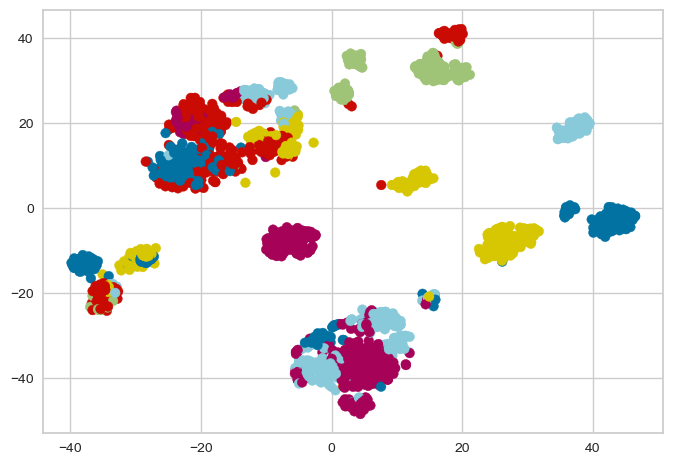

Number of PCs: 500


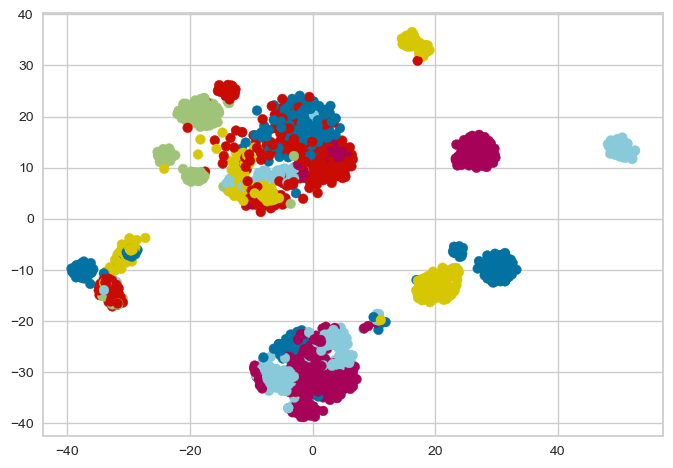

In [77]:
for n_pcs in [10,50,100,250,500]:
    print("Number of PCs:", n_pcs)
    z_tsne = TSNE(n_components=2,perplexity=40).fit_transform(Xlt[:,0:n_pcs])
    plt.scatter(z_tsne[:,0],z_tsne[:,1], c=colors5Xlt[clustering5Xlt.labels_])
    plt.show()

Perplexity: 5


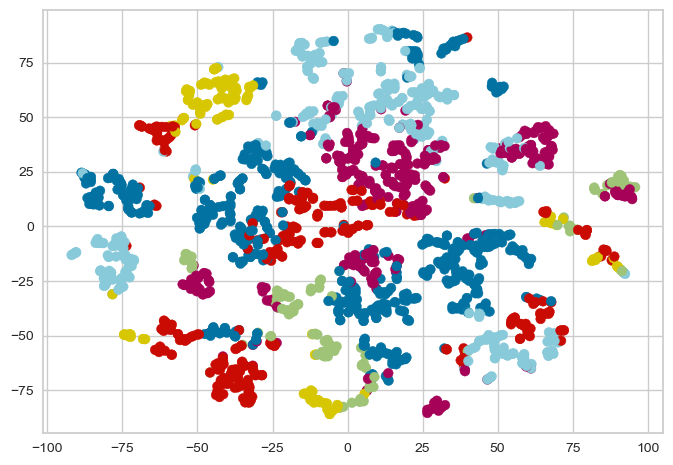

Perplexity: 10


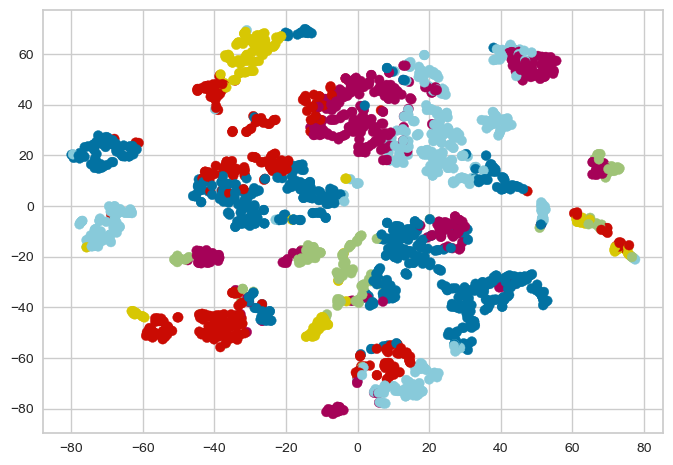

Perplexity: 20


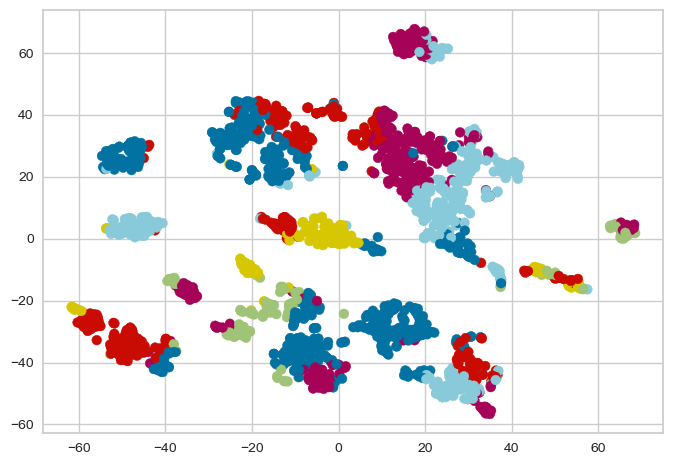

Perplexity: 30


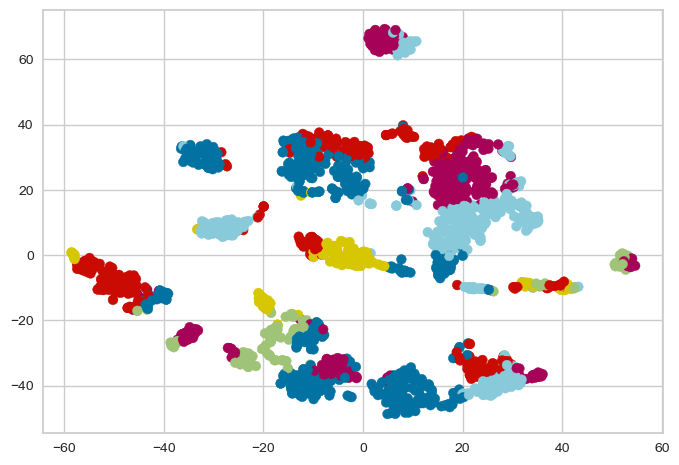

Perplexity: 40


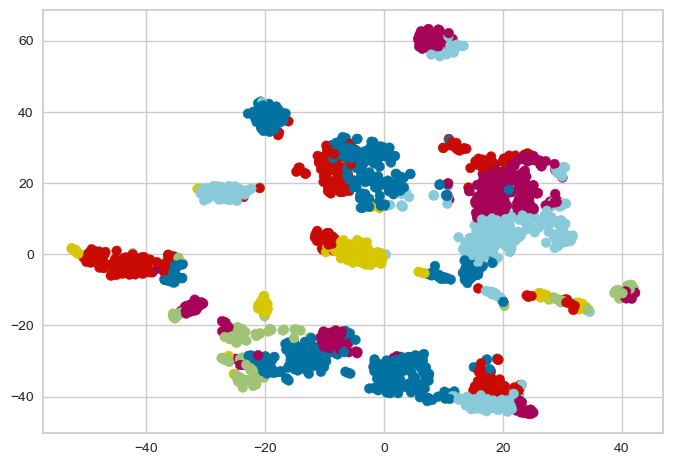

Perplexity: 50


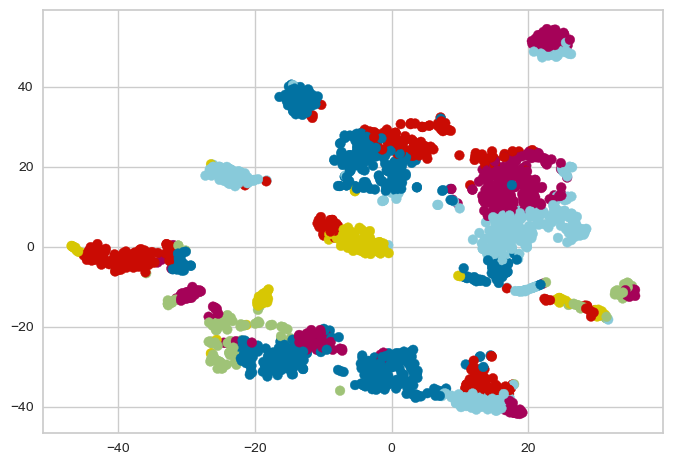

Perplexity: 60


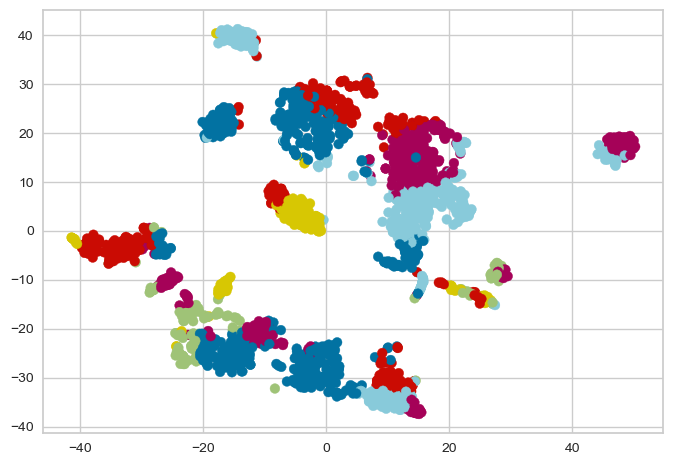

In [84]:
for perplexity in [5,10,20,30,40,50,60]:
    print("Perplexity:", perplexity)
    z_tsne = TSNE(n_components=2,perplexity=perplexity).fit_transform(Xt[:,0:50])
    plt.scatter(z_tsne[:,0],z_tsne[:,1], c=colors5Xt[clustering5Xt.labels_])
    plt.show()